'''Problem Statement: 

ICMR wants to analyze different types of cancers, such as breast cancer, renal cancer, colon cancer, lung cancer,
 and prostate cancer becoming a cause of worry in recent years. They would like to identify the probable cause of
  these cancers in terms of genes responsible for each cancer type. This would lead us to early identification of
   each type of cancer reducing the fatality rate.'''


'''The input dataset contains 802 samples for the corresponding 802 people who have been detected with different
 types of cancer. Each sample contains expression values of more than 20K genes. Samples have one of the types
  of tumors: BRCA, KIRC, COAD, LUAD, and PRAD.'''

# BRCA cancer- breast cancer
# COAD cancer- common malignant tumor in the digestive tract  
# KIRC cancer- Kidney renal 
# LUAD cancer- Lung cancer 
# PRAD cancer- Parotid tumors are abnormal growths of cells (tumors) that form in  the parotid glands

In [ ]:
# download the dataset
!wget https://www.dropbox.com/sh/8q39v4rvo9hq7hy/AAAfAs9J12eevM_9_jPySJ1xa?dl=0

--2022-09-17 09:20:49--  https://www.dropbox.com/sh/8q39v4rvo9hq7hy/AAAfAs9J12eevM_9_jPySJ1xa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/8q39v4rvo9hq7hy/AAAfAs9J12eevM_9_jPySJ1xa [following]
--2022-09-17 09:20:49--  https://www.dropbox.com/sh/raw/8q39v4rvo9hq7hy/AAAfAs9J12eevM_9_jPySJ1xa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca09b971735544d5f2bfe2646b9.dl.dropboxusercontent.com/zip_download_get/BQdUyQq6BJOs2-bke5iDOBdVR2b406-G_OKBubbR0OwZY_MDD9DRllkln2xhqywZAKRmABqWBtwRVNQ7Y5ygdgJKMS3c0QYC6uoTI-c6sLs6KA# [following]
--2022-09-17 09:20:50--  https://uca09b971735544d5f2bfe2646b9.dl.dropboxusercontent.com/zip_download_get/BQdUyQq6BJOs2-bke5iDOBdVR2b406-G_OKBubbR0OwZY_MDD9DRllkln2xhqywZAKRmABqWBtwRVNQ7Y5ygdgJKM

In [ ]:
# unzip the file
!unzip -qq /content/AAAfAs9J12eevM_9_jPySJ1xa?dl=0

mapname:  conversion of  failed
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y

1 archive had fatal errors.


In [ ]:
!pip install tensorflow==2.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [ ]:
import sys
import csv

csv.field_size_limit(sys.maxsize)

9223372036854775807

In [ ]:
label = pd.read_csv('/content/labels.csv', delimiter=',', engine='python')
data = pd.read_csv('/content/data.csv', delimiter=',', engine='python')
data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


Project Task: Week 1

Exploratory Data Analysis:

In [ ]:
# Merge both the datasets
master_data = pd.merge(data, label)
master_data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [ ]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Columns: 20533 entries, Unnamed: 0 to Class
dtypes: float64(20531), object(2)
memory usage: 125.5+ MB


In [ ]:
# check for null values
master_data.isnull().sum()

Unnamed: 0    0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Class         0
Length: 20533, dtype: int64

In [ ]:
master_data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


Plot the merged dataset as a hierarchically-clustered heatmap

In [ ]:
heatmap_data = pd.pivot_table(master_data, index=['Class'])                       
heatmap_data.head()

,gene_0,gene_1,gene_10,gene_100,gene_1000,gene_10000,gene_10001,gene_10002,gene_10003,gene_10004,...,gene_9990,gene_9991,gene_9992,gene_9993,gene_9994,gene_9995,gene_9996,gene_9997,gene_9998,gene_9999
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,0.011362,2.839739,0.544066,10.681488,10.303568,3.258028,7.339461,7.900497,7.489146,7.508378,...,1.969278,5.142237,1.736160,2.312551,1.696127,2.493789,0.046527,2.099709,0.151063,6.954733
COAD,0.022212,3.438381,0.357278,11.015745,9.951124,3.462039,5.526673,7.487396,3.783493,6.959238,...,2.216178,0.354828,1.833606,1.619692,3.839205,2.396207,0.090327,2.298246,0.065007,6.618466
KIRC,0.046544,2.398129,1.166824,10.238999,11.148094,1.651798,6.895752,7.686932,7.269611,7.636246,...,1.824964,0.596508,2.393303,1.872888,1.289448,3.139623,0.130416,2.387948,0.148641,6.429343
LUAD,0.041088,3.358260,0.607541,10.517670,10.503698,3.754181,7.281878,7.041924,6.145042,7.148682,...,2.609490,2.801700,2.738326,1.869805,2.217144,2.459608,0.042070,2.281828,0.056608,6.721517
PRAD,0.026544,3.441041,0.765608,10.282936,9.967433,1.949878,7.946141,8.529695,5.696368,7.396572,...,1.623491,4.594215,1.684084,2.588050,1.703772,3.568490,0.572893,3.621548,0.094953,7.104225


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


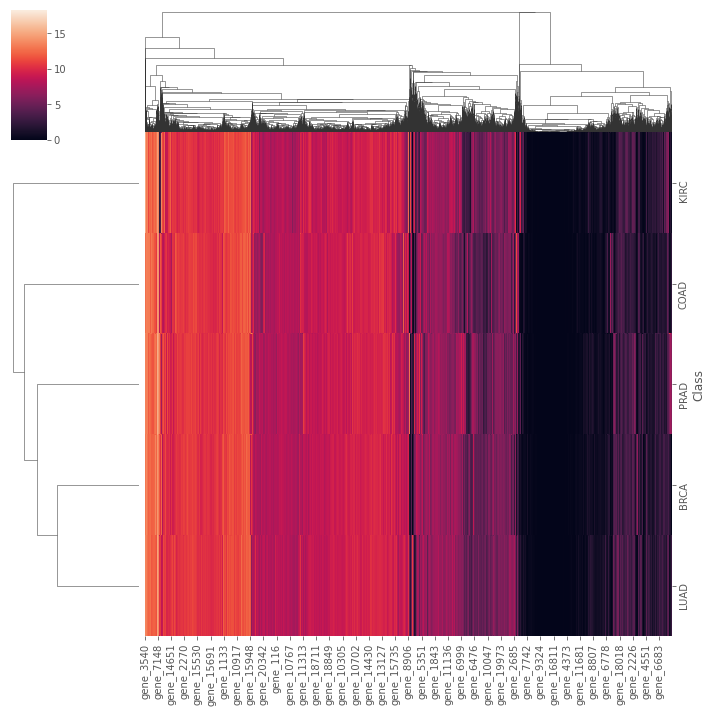

In [ ]:
sns.clustermap(heatmap_data)
plt.savefig('heatmap_with_Seaborn_clustermap_python.jpg',
            dpi=150, figsize=(8,12))

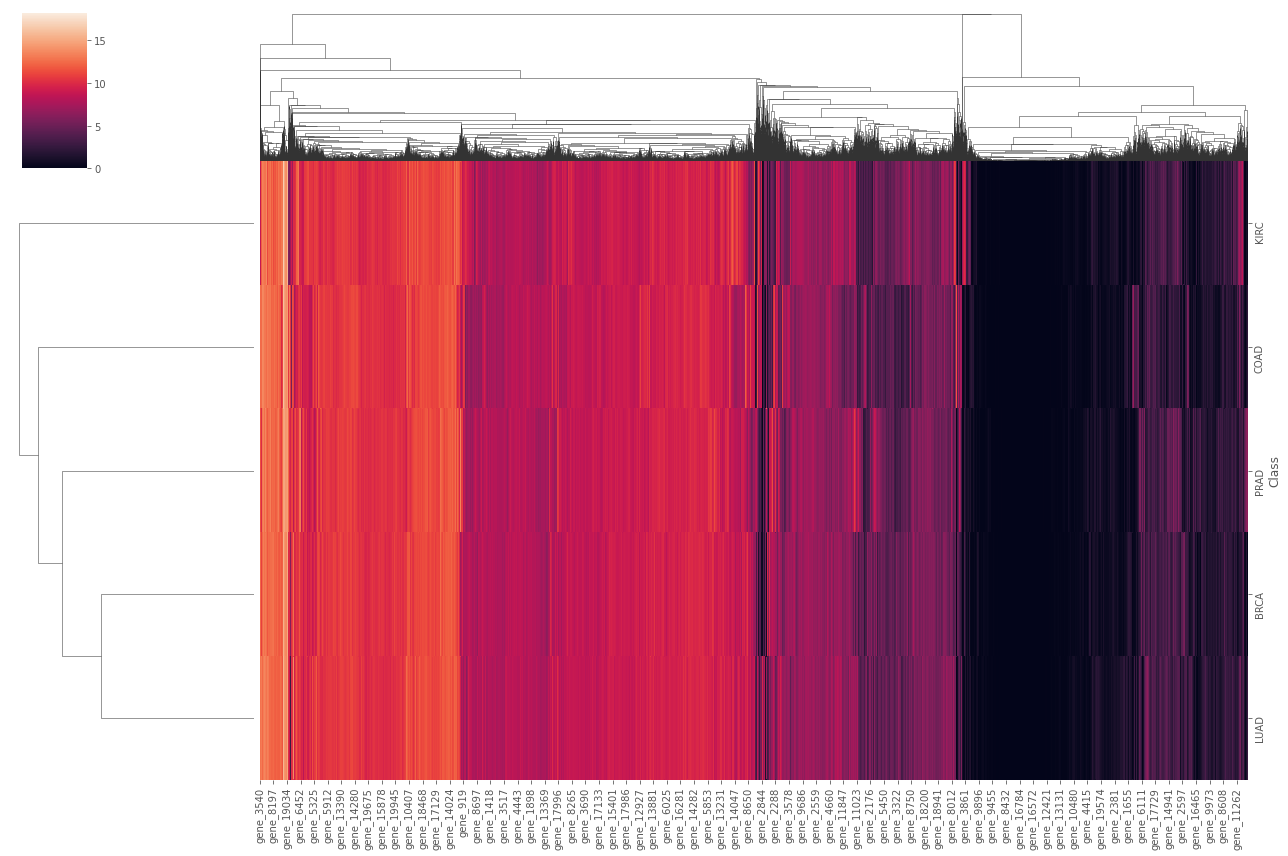

In [ ]:
sns.clustermap(heatmap_data, figsize=(18,12))
plt.savefig('clustered_heatmap_with_dendrograms_Seaborn_clustermap_python.jpg',dpi=150)

FEATURE SELECTION

split the data into train and test to avoid data-leakage

In [ ]:
master_data.head(5)

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = master_data.iloc[:,1:-1]  #independent columns
y = master_data.iloc[:,-1]    #target column 

In [ ]:
X.head(5)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
y.head(5)

0    PRAD
1    LUAD
2    PRAD
3    PRAD
4    BRCA
Name: Class, dtype: object

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [ ]:
featureScores

,Specs,Score
0,gene_0,5.961875
1,gene_1,39.868223
2,gene_2,68.101756
3,gene_3,17.713982
4,gene_4,3.288049
...,...,...
20526,gene_20526,3.423439
20527,gene_20527,0.883221
20528,gene_20528,2.627112
20529,gene_20529,85.544690


In [ ]:
print(featureScores.nlargest(10000,'Score'))  #print 10 best features from 20531 features

            Specs        Score
9176    gene_9176  8580.566498
9175    gene_9175  7363.380532
15898  gene_15898  6902.074640
220      gene_220  6333.703681
219      gene_219  6259.461507
...           ...          ...
5653    gene_5653    27.130171
3993    gene_3993    27.129118
168      gene_168    27.127408
8281    gene_8281    27.100767
4090    gene_4090    27.097594

[10000 rows x 2 columns]


Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0. 0. 0. ... 0. 0. 0.]


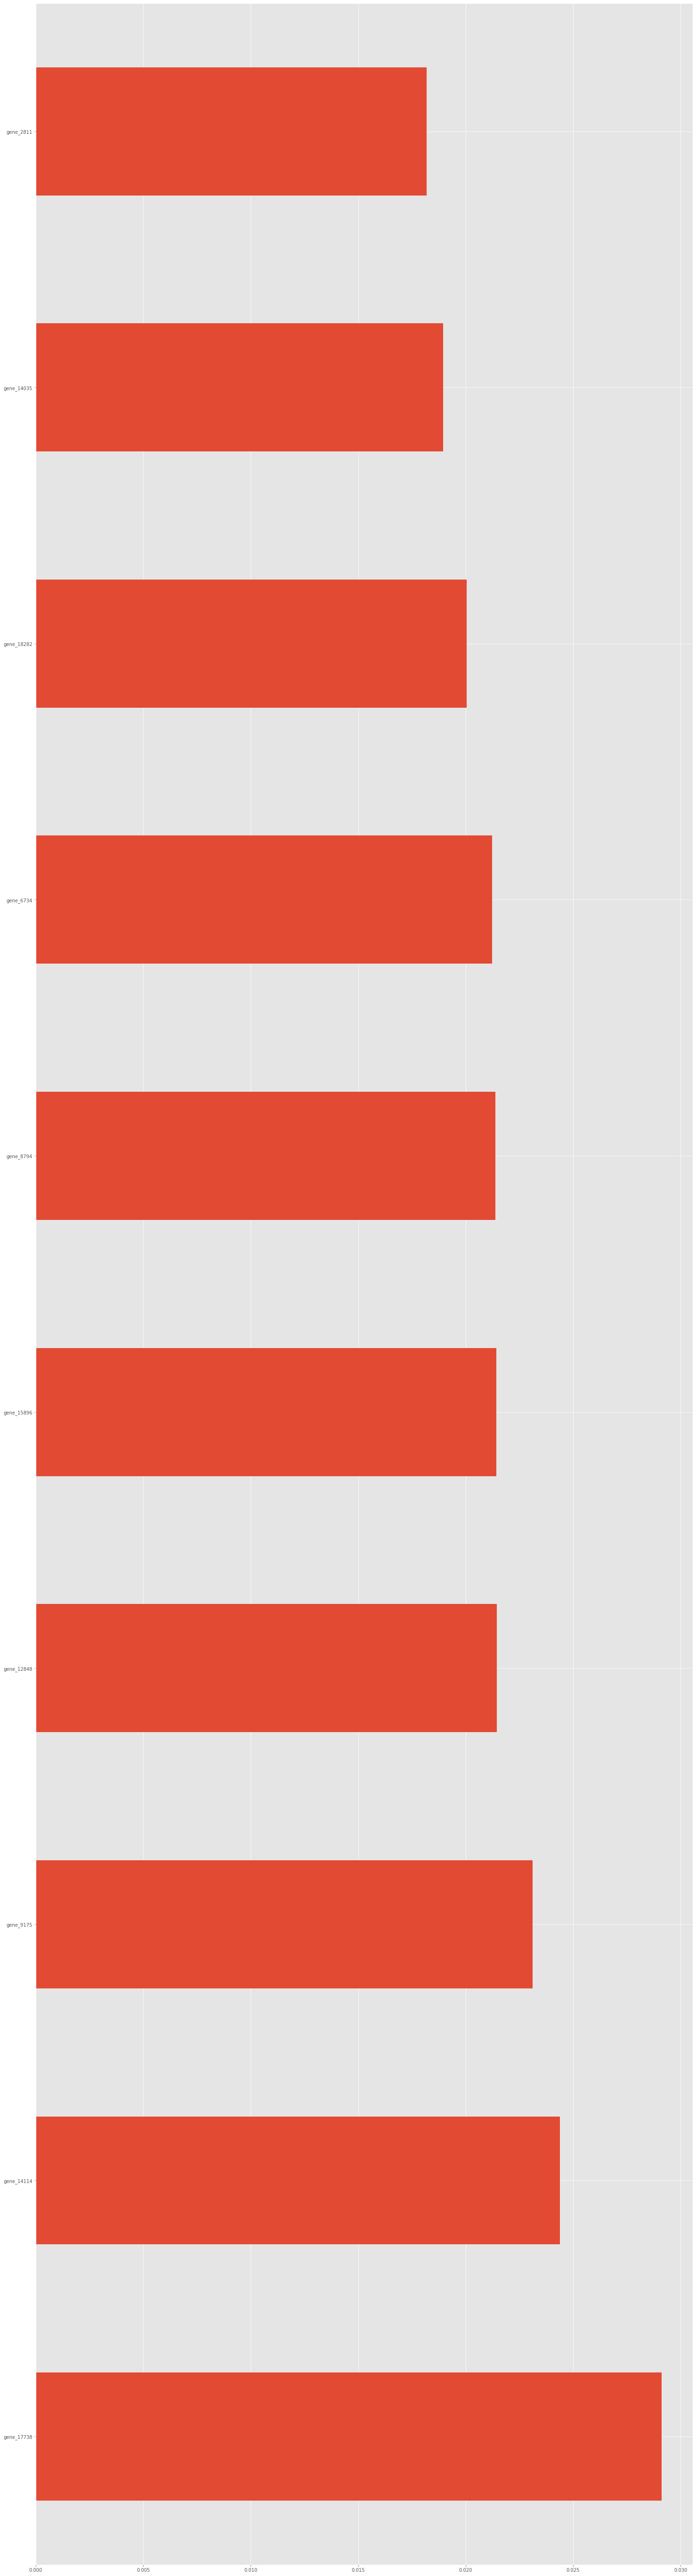

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(25,100))
plt.show()

Checking histogram to check if the data is normally distributed

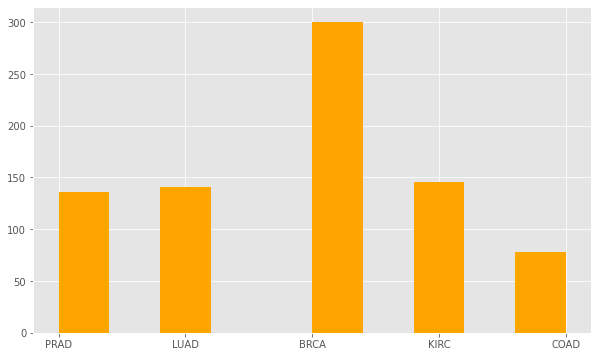

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(master_data['Class'], color = "orange")
plt.show()

In [ ]:
non_cat_data = master_data.drop(['Unnamed: 0'], axis=1)
non_cat_data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000,LUAD
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000,PRAD
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000,PRAD
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000,BRCA
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000,LUAD
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693,COAD
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000,PRAD


Checking for null values

In [ ]:
nan_cols = [i for i in non_cat_data.columns if non_cat_data[i].isnull().any()]
nan_cols

[]

In [ ]:
# change the first column name
first_column = master_data.iloc[: , :1]
first_column.head(5)

,Unnamed: 0
0,sample_0
1,sample_1
2,sample_2
3,sample_3
4,sample_4


Dimensionality Reduction:

Each sample has expression values for around 20K genes. However, it may not be necessary to include all 20K genes expression values to analyze each cancer type. Therefore, we will identify a smaller set of attributes which will then be used to fit multiclass classification models. So, the first task targets the dimensionality reduction using various techniques such as, PCA, LDA, and t-SNE.bold text

Project Task: Week 2

Clustering Genes and Samples:

Our next goal is to identify groups of genes that behave similarly across samples and identify the distribution of samples corresponding to each cancer type. Therefore, this task focuses on applying various clustering techniques, e.g., k-means, hierarchical and mean shift clustering, on genes and samples.

First, apply the given clustering technique on all genes to identify:

Genes whose expression values are similar across all samples

Genes whose expression values are similar across samples of each cancer type

Next, apply the given clustering technique on all samples to identify:

Samples of the same class (cancer type) which also correspond to the same cluster

Samples identified to be belonging to another cluster but also to the same class (cancer type)

PRINCIPAL COMPONENT ANALYSIS (pca) - https://www.youtube.com/watch?v=FgakZw6K1QQ

REFERENCE - 

https://www.youtube.com/watch?v=OFyyWcw2cyM

https://github.com/krishnaik06/Dimesnsionality-Reduction/blob/master/01-Principal%20Component%20Analysis.ipynb

**PCA Visualization**

As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data_w_o_y = master_data.drop(['Unnamed: 0', 'Class'], axis=1)
data_w_o_y.head(5)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
data_w_o_y.values.shape

(801, 20531)

In [ ]:
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(data_w_o_y)
X_Scaled

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

In [ ]:
master_data.head(5)

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [ ]:
master_data

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000,BRCA
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000,LUAD
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693,COAD
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000,PRAD


In [ ]:
no_target_master_data = master_data.drop(['Class'], axis=1)
no_target_master_data.head(5)

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
no_target_master_data.set_index('Unnamed: 0', inplace=True)
no_target_master_data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693


In [ ]:
no_target_master_data.T

Unnamed: 0,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_791,sample_792,sample_793,sample_794,sample_795,sample_796,sample_797,sample_798,sample_799,sample_800
gene_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.436588,0.000000,0.000000,0.000000,0.000000,0.000000
gene_1,2.017209,0.592732,3.511759,3.663618,2.655741,3.467853,1.224966,2.854853,3.992125,3.642494,...,3.080061,4.337404,2.068224,4.288388,4.472176,1.865642,3.942955,3.249582,2.590339,2.325242
gene_2,3.265527,1.588421,4.327199,4.507649,2.821547,3.581918,1.691177,1.750478,2.772730,4.423558,...,2.815739,2.597126,0.857663,3.452490,4.908746,2.718197,4.453807,3.707492,2.787976,3.805932
gene_3,5.478487,7.586157,6.881787,6.659068,6.539454,6.620243,6.572007,7.226720,6.546692,6.849511,...,6.209617,6.070379,6.218739,7.209151,5.937848,7.350099,6.346597,8.185901,7.318624,6.530246
gene_4,10.431999,9.623011,9.870730,10.196184,9.738265,9.706829,9.640511,9.758691,10.488252,9.464466,...,9.644469,9.863990,10.623068,9.875620,9.330901,10.006003,10.056868,9.504082,9.987136,9.560367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene_20526,12.003135,12.674552,9.045255,11.392682,11.922439,11.556995,13.256060,12.670377,12.498919,11.144295,...,11.035335,10.864960,10.703722,10.790014,10.961247,12.031267,11.633422,12.180944,11.198279,11.641081
gene_20527,9.650743,10.517059,9.788359,9.694814,9.217749,9.244150,9.664486,9.987733,10.389954,9.244851,...,11.030377,9.617853,9.144204,10.698991,10.203226,9.813063,10.317266,10.681194,10.335513,10.607358
gene_20528,8.921326,9.397854,10.090470,9.684365,9.461191,9.836473,9.244219,9.216872,10.390255,9.484299,...,10.119304,12.813320,9.682057,10.081523,10.030005,10.092770,8.745983,9.466711,10.400581,9.844794
gene_20529,5.286759,2.094168,1.683023,3.292001,5.110372,5.355133,8.330912,6.551490,7.828321,4.759151,...,7.313500,3.805261,5.384968,4.376693,3.675703,8.819269,9.659081,4.677458,5.718751,4.550716


In [ ]:
from sklearn import preprocessing

# First center and scale the data
scaled_data = preprocessing.scale(no_target_master_data)

scaled_data

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

In [ ]:
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

scree plot

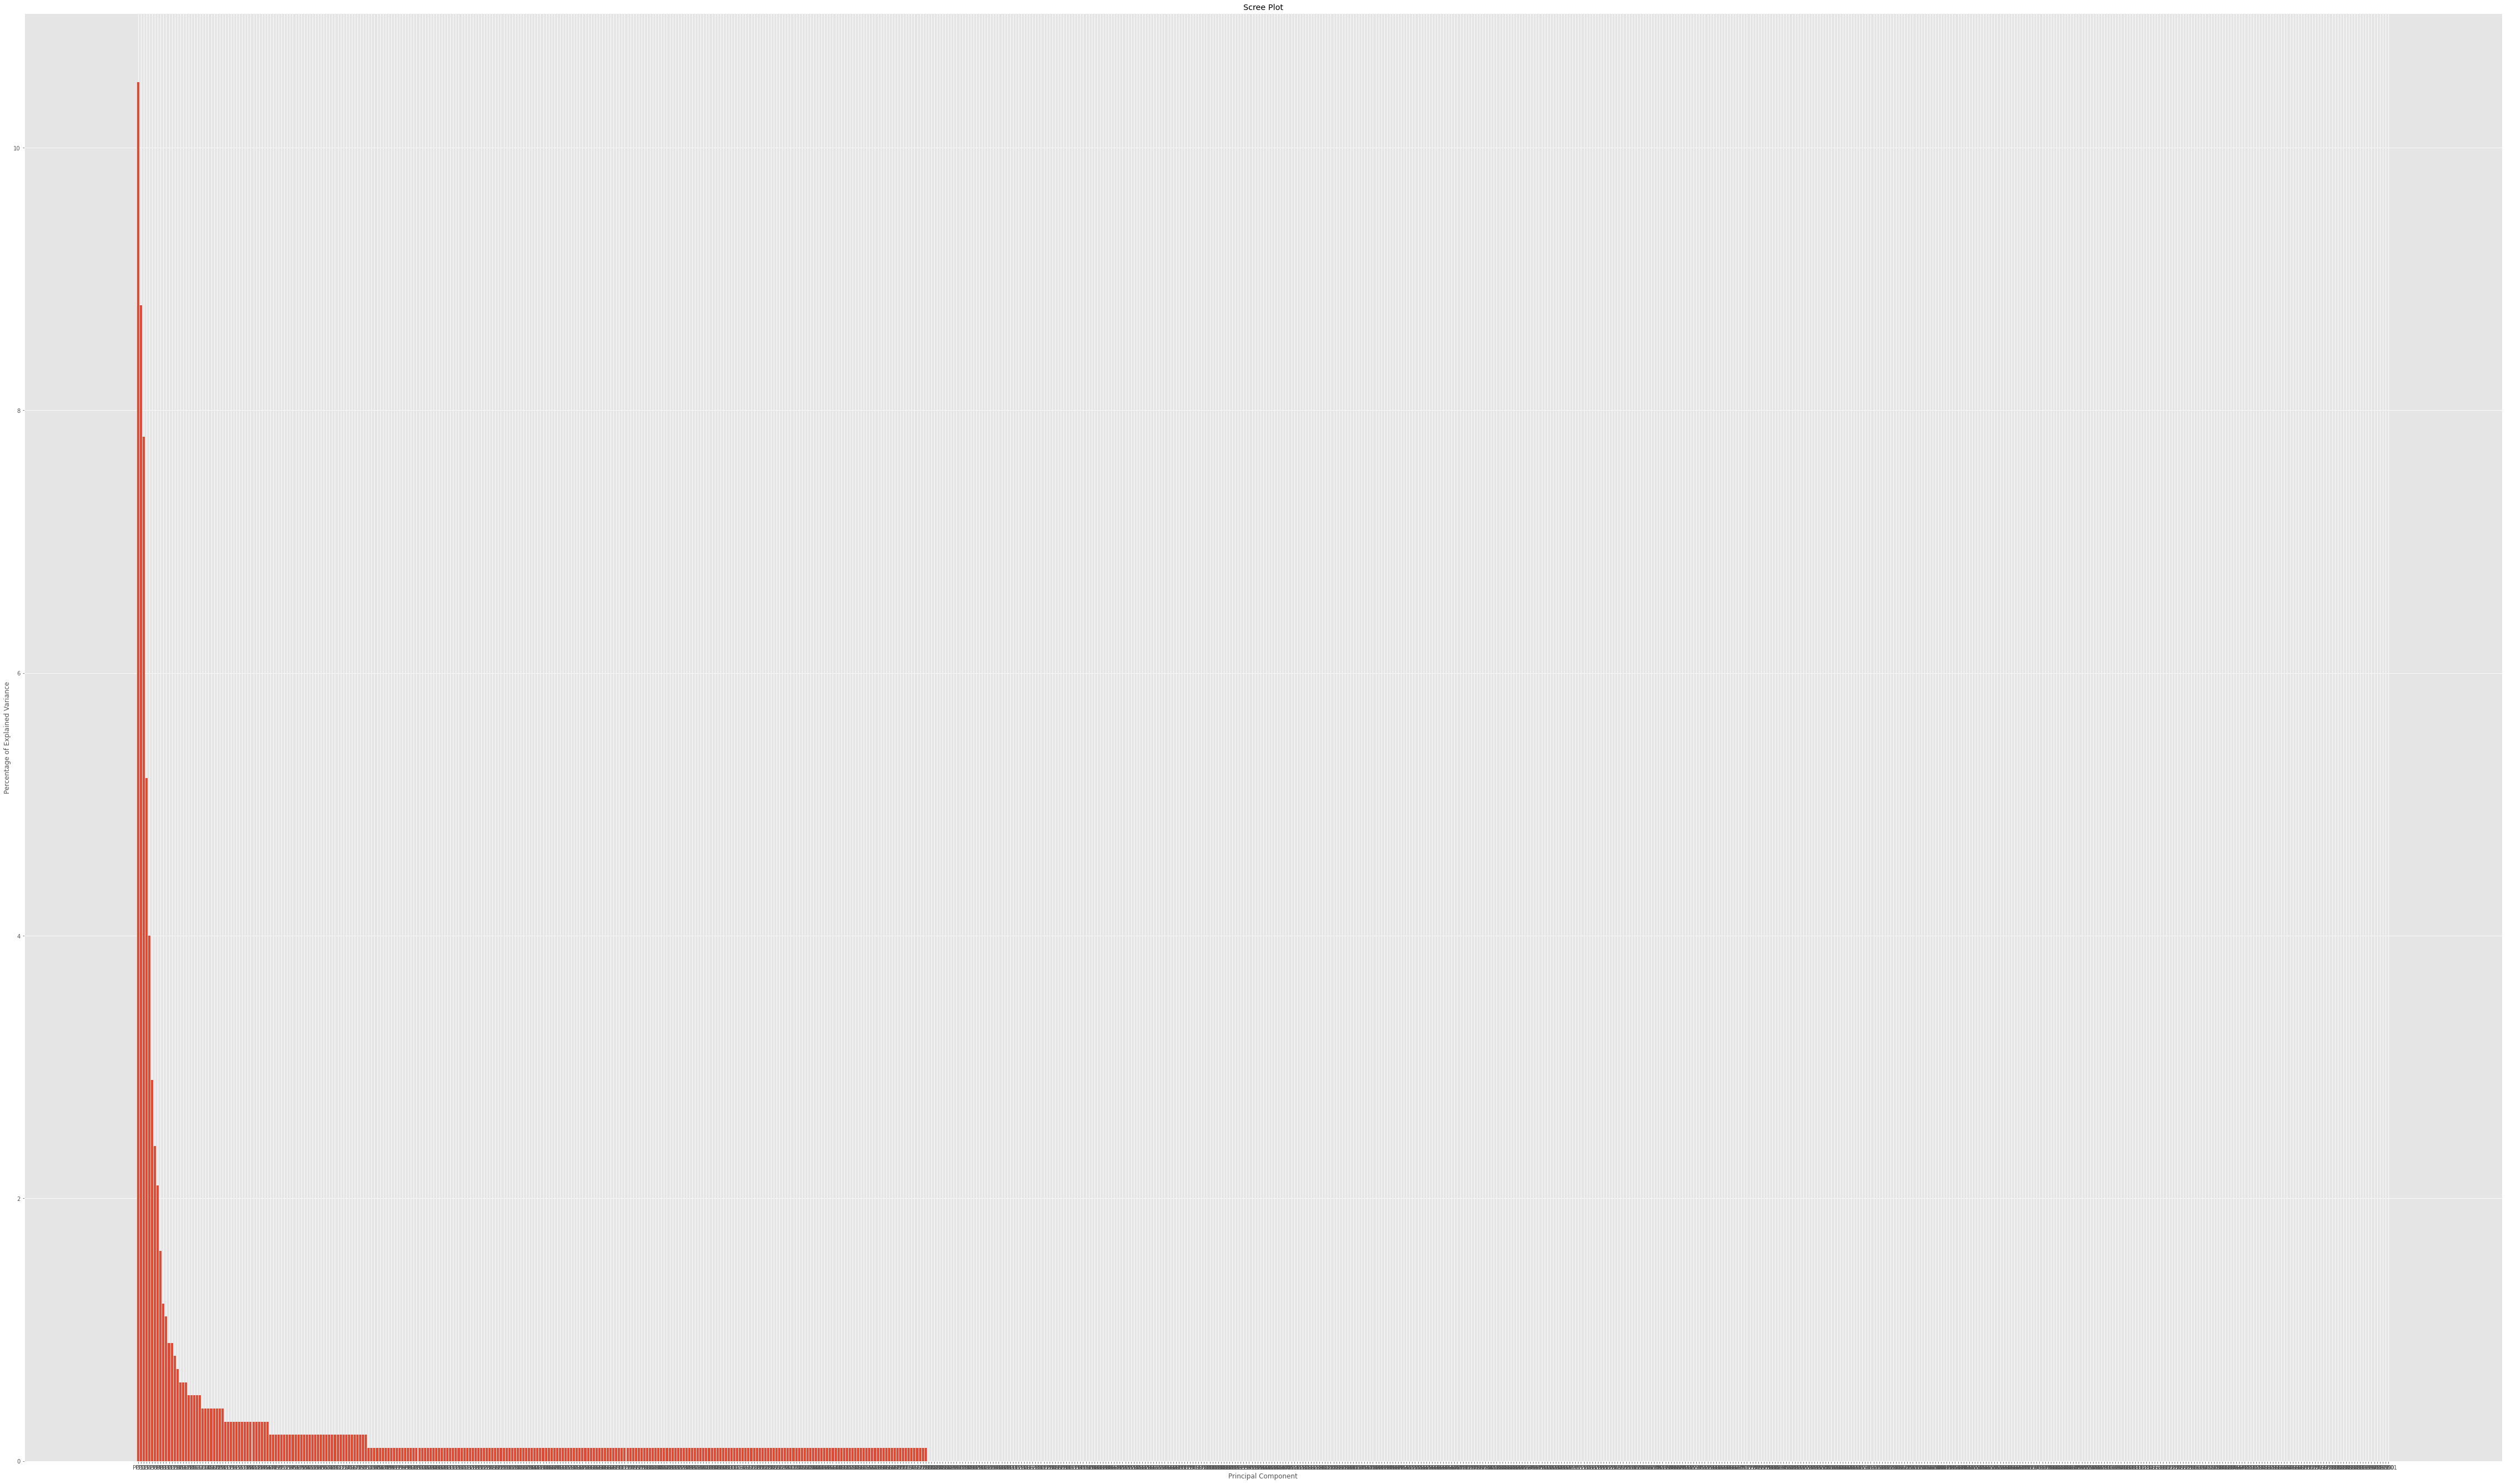

In [ ]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(80,48)) 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

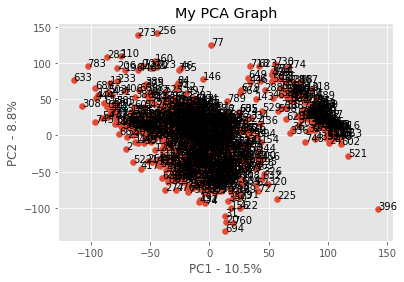

In [ ]:
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [ ]:
genes = no_target_master_data.columns.values.tolist()
genes

['gene_0',
 'gene_1',
 'gene_2',
 'gene_3',
 'gene_4',
 'gene_5',
 'gene_6',
 'gene_7',
 'gene_8',
 'gene_9',
 'gene_10',
 'gene_11',
 'gene_12',
 'gene_13',
 'gene_14',
 'gene_15',
 'gene_16',
 'gene_17',
 'gene_18',
 'gene_19',
 'gene_20',
 'gene_21',
 'gene_22',
 'gene_23',
 'gene_24',
 'gene_25',
 'gene_26',
 'gene_27',
 'gene_28',
 'gene_29',
 'gene_30',
 'gene_31',
 'gene_32',
 'gene_33',
 'gene_34',
 'gene_35',
 'gene_36',
 'gene_37',
 'gene_38',
 'gene_39',
 'gene_40',
 'gene_41',
 'gene_42',
 'gene_43',
 'gene_44',
 'gene_45',
 'gene_46',
 'gene_47',
 'gene_48',
 'gene_49',
 'gene_50',
 'gene_51',
 'gene_52',
 'gene_53',
 'gene_54',
 'gene_55',
 'gene_56',
 'gene_57',
 'gene_58',
 'gene_59',
 'gene_60',
 'gene_61',
 'gene_62',
 'gene_63',
 'gene_64',
 'gene_65',
 'gene_66',
 'gene_67',
 'gene_68',
 'gene_69',
 'gene_70',
 'gene_71',
 'gene_72',
 'gene_73',
 'gene_74',
 'gene_75',
 'gene_76',
 'gene_77',
 'gene_78',
 'gene_79',
 'gene_80',
 'gene_81',
 'gene_82',
 'gene_83',
 '

In [ ]:
#########################
#
# Determine which genes had the biggest influence on PC1
#
#########################
 
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene_19862    0.019002
gene_17360    0.018985
gene_13489    0.018966
gene_15158    0.018777
gene_7031     0.018740
gene_7019     0.018657
gene_10788    0.018629
gene_13507   -0.018624
gene_6543     0.018595
gene_2288    -0.018592
dtype: float64


We can't choose top 10.

In [ ]:
# Import PCA from sklearn and define the n_components as 2 
from sklearn.decomposition import PCA
pca_with_2=PCA(n_components=2)

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [ ]:
two_master_data = master_data

In [ ]:
three_master_data = master_data

In [ ]:
# Define data 
df_pca = two_master_data.drop(['Unnamed: 0'], axis=1)
df_pca = df_pca.drop(['Class'], axis=1)
df_pca.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
df_pca.values.shape

(801, 20531)

In [ ]:
x_pca = df_pca.values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(x_pca)
X_Scaled

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

In [ ]:
# Import PCA from sklearn and define the n_components as 2 
from sklearn.decomposition import PCA
pca_with_2=PCA(n_components=2)

In [ ]:
#Perform fit transform on the scaled data
X_pca_with_2 = pca_with_2.fit_transform(X_Scaled)
X_pca_with_2.shape

(801, 2)

In [ ]:
X_pca_with_2

array([[-57.44698695,  95.41098124],
       [-16.91943006,   0.73246957],
       [-70.34521785, -19.30332741],
       ...,
       [ -4.13308964,  15.69001418],
       [-30.81475744,  33.52642257],
       [-22.34455668,   4.05235621]])

In [ ]:
df_cat_data = three_master_data

In [ ]:
df_cat_data.head(5)

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [ ]:
df_cat_data['Class'] = df_cat_data['Class'].map({'PRAD': 1, 'LUAD': 2, 'BRCA': 3, 'KIRC': 4, 'COAD': 5}) 
df_cat_data = df_cat_data.drop(['Unnamed: 0'],axis=1)

In [ ]:
# Put the data back on the 2 columns defined 
df_pca = pd.DataFrame(X_pca_with_2)
df_pca.columns = ['pca1','pca2']

# Add the convereted categorical data for 
df_pca['cancer_type']=df_cat_data['Class']
df_pca

,pca1,pca2,cancer_type
0,-57.446987,95.410981,1
1,-16.919430,0.732470,2
2,-70.345218,-19.303327,1
3,-49.161591,-9.227586,1
4,-18.132534,-51.327797,3
...,...,...,...
796,-12.417385,-42.321574,3
797,-29.415554,28.526281,2
798,-4.133090,15.690014,5
799,-30.814757,33.526423,1


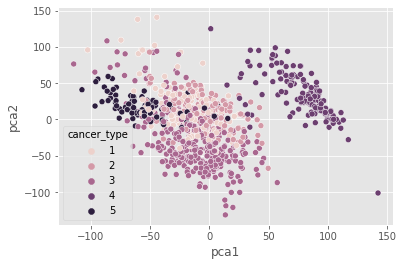

In [ ]:
# Present the data on the 5 clusters using seaborn maps 
sns.scatterplot(x='pca1',y='pca2', hue = 'cancer_type',data=df_pca)

# ***PCA with n_components=.995***

In [ ]:
pca_with_995=PCA(.995)
X_pca_with_995 = pca_with_995.fit_transform(x_pca)

In [ ]:
X_pca_with_995.shape

(801, 747)

In [ ]:
X_pca_with_995

array([[-6.27554152e+01, -9.40719735e+01,  8.95198311e+01, ...,
         3.09258084e+00,  7.13597730e-01, -8.21221710e-02],
       [-2.43289636e+00,  9.05858418e+01, -1.06730787e+00, ...,
         1.39674724e-02, -3.95175744e-01, -9.49947250e-01],
       [-7.12668528e+01, -8.06460774e+00,  6.61124549e+01, ...,
         1.28898532e-01, -2.64530262e-01,  3.84594189e-01],
       ...,
       [ 1.04862615e+01,  2.15705946e+01,  4.13458784e+01, ...,
        -6.47882986e-01, -2.07256774e-01,  1.38942922e-01],
       [-5.50636049e+01, -9.23947780e+01,  8.00500394e+01, ...,
         1.74673062e+00,  2.02232239e+00, -1.92708948e+00],
       [-4.91030338e+01, -5.09976391e+01,  4.05037544e+01, ...,
         1.80367340e+00,  2.22994027e+00, -8.07255452e-01]])

In [ ]:
df_pca_995 = pd.DataFrame(X_pca_with_995)
df_pca_995['cancer_type']=df_cat_data['Class']
df_pca_995

,0,1,2,3,4,5,6,7,8,9,...,738,739,740,741,742,743,744,745,746,cancer_type
0,-62.755415,-94.071973,89.519831,-15.942567,81.423539,-13.998292,7.716073,-22.936551,-32.837892,-2.202680,...,-4.081064,-0.626193,-1.265756,-0.017984,-2.740860,0.944037,3.092581,0.713598,-0.082122,1
1,-2.432896,90.585842,-1.067308,-53.083120,-15.676684,60.842472,10.257369,-48.822959,14.257400,-12.214352,...,0.215619,-0.593678,-0.403462,1.181537,0.490910,0.197768,0.013967,-0.395176,-0.949947,2
2,-71.266853,-8.064608,66.112455,81.381475,-7.525685,109.824273,5.519407,-13.364480,38.415728,-5.124731,...,0.263786,0.328453,0.004078,0.363928,-1.109210,0.331488,0.128899,-0.264530,0.384594,1
3,-84.770785,-73.244566,74.181000,27.022697,-18.044895,50.116433,-3.495197,-11.318520,8.319656,-3.149509,...,0.381578,0.652455,-3.624900,-1.203028,-2.347912,1.577992,-0.781748,0.120442,-0.057973,1
4,-69.560171,-9.612940,-67.497549,34.868543,-1.795849,-6.676780,-2.840781,16.780157,-49.319753,10.508631,...,1.488047,2.767486,-0.631562,-0.794275,-0.514008,-1.875969,-2.526109,-1.073803,-1.161728,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-60.861882,-22.278633,-80.927167,42.670292,7.843763,-4.545218,-27.602910,-8.840676,-31.531870,6.380236,...,-0.780676,0.105227,-2.001001,1.579115,0.955344,0.085881,2.667448,0.632850,0.023523,3
797,-14.465433,53.392194,38.153904,-63.217345,22.799082,39.543441,-47.899401,39.925172,-12.413483,43.364820,...,-0.712822,0.624739,-0.162403,-0.238540,0.584705,1.404867,0.564251,-0.054682,-0.905574,2
798,10.486261,21.570595,41.345878,-59.639929,-2.163066,-96.453878,38.375897,46.997294,60.604643,59.967025,...,0.269628,-0.348648,-0.531710,0.055553,0.220559,0.331122,-0.647883,-0.207257,0.138943,5
799,-55.063605,-92.394778,80.050039,-7.782015,15.180574,2.563620,8.487660,10.571657,11.710577,1.304005,...,0.045885,-2.222754,-4.115667,-0.064646,-0.447662,-0.243658,1.746731,2.022322,-1.927089,1


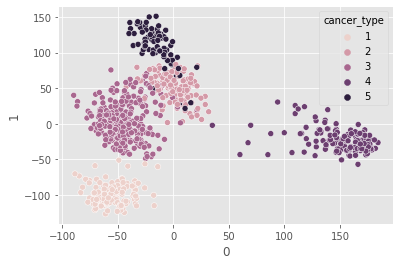

In [ ]:
sns.scatterplot(x=0,y=1,hue = 'cancer_type', data=df_pca_995)

How to select the number of components

In [ ]:
four_master_data = master_data

In [ ]:
five_master_data = master_data

In [ ]:
# Define data 
df4_pca = four_master_data.drop(['Unnamed: 0'], axis=1)
df4_pca = df4_pca.drop(['Class'], axis=1)
df4_pca.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df4_pca)

In [ ]:
# 100% of variance
from sklearn.decomposition import PCA
pca_801 = PCA(n_components = 801)
pca_801.fit(data_rescaled)
X_pca_801 = pca_801.transform(data_rescaled)

In [ ]:
print("Variance explained by 95 components : ", sum(pca_801.explained_variance_ratio_ * 100))

Variance explained by 95 components :  100.00000000000003


In [ ]:
pca_801.explained_variance_ratio_ * 100

array([1.26939772e+01, 9.40227342e+00, 8.57576510e+00, 5.58780751e+00,
       4.77172956e+00, 2.78327442e+00, 2.40165349e+00, 2.25852545e+00,
       1.45690190e+00, 1.33313416e+00, 1.05892454e+00, 8.81806123e-01,
       8.51203152e-01, 7.31216746e-01, 6.42923988e-01, 5.95138322e-01,
       5.92295108e-01, 5.56765271e-01, 4.98516572e-01, 4.84822226e-01,
       4.62686834e-01, 4.36508060e-01, 4.20472556e-01, 4.09571927e-01,
       3.93242673e-01, 3.85532774e-01, 3.77670869e-01, 3.60055207e-01,
       3.36857943e-01, 3.29228737e-01, 3.22253680e-01, 3.11292654e-01,
       3.05774329e-01, 2.91575476e-01, 2.84189640e-01, 2.77149771e-01,
       2.68797419e-01, 2.67206072e-01, 2.62394709e-01, 2.49606137e-01,
       2.46834687e-01, 2.45449784e-01, 2.43262686e-01, 2.39574096e-01,
       2.35317421e-01, 2.31110754e-01, 2.26577781e-01, 2.19884009e-01,
       2.17494494e-01, 2.15047509e-01, 2.07778997e-01, 2.04651348e-01,
       2.00241205e-01, 1.99217671e-01, 1.97566987e-01, 1.94325702e-01,
      

In [ ]:
np.cumsum(pca_801.explained_variance_ratio_ * 100)

array([ 12.6939772 ,  22.09625062,  30.67201572,  36.25982323,
        41.0315528 ,  43.81482722,  46.21648071,  48.47500616,
        49.93190806,  51.26504222,  52.32396676,  53.20577288,
        54.05697604,  54.78819278,  55.43111677,  56.02625509,
        56.6185502 ,  57.17531547,  57.67383204,  58.15865427,
        58.6213411 ,  59.05784916,  59.47832172,  59.88789365,
        60.28113632,  60.66666909,  61.04433996,  61.40439517,
        61.74125311,  62.07048185,  62.39273553,  62.70402818,
        63.00980251,  63.30137799,  63.58556763,  63.8627174 ,
        64.13151482,  64.39872089,  64.6611156 ,  64.91072174,
        65.15755642,  65.40300621,  65.64626889,  65.88584299,
        66.12116041,  66.35227117,  66.57884895,  66.79873296,
        67.01622745,  67.23127496,  67.43905396,  67.6437053 ,
        67.84394651,  68.04316418,  68.24073117,  68.43505687,
        68.62800665,  68.81730479,  69.00166821,  69.18535519,
        69.36336368,  69.53922893,  69.71496136,  69.88

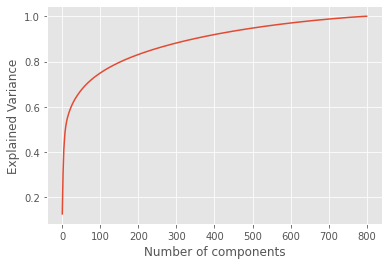

In [ ]:
plt.plot(np.cumsum(pca_801.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.savefig("elbow_plot.png", dpi=100)

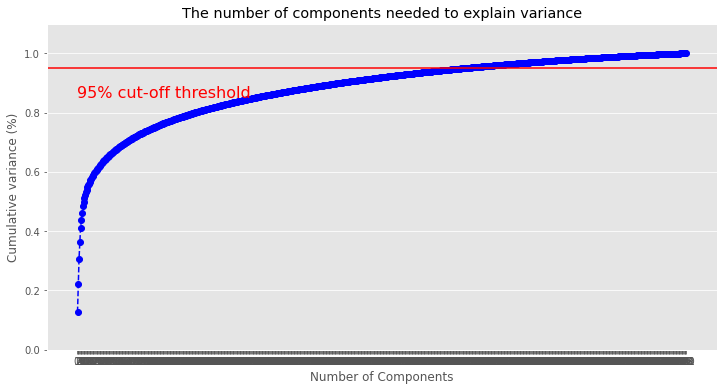

In [ ]:
pca_801_fit = PCA().fit(data_rescaled)

# % matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 802, step=1)
y = np.cumsum(pca_801_fit.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 802, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

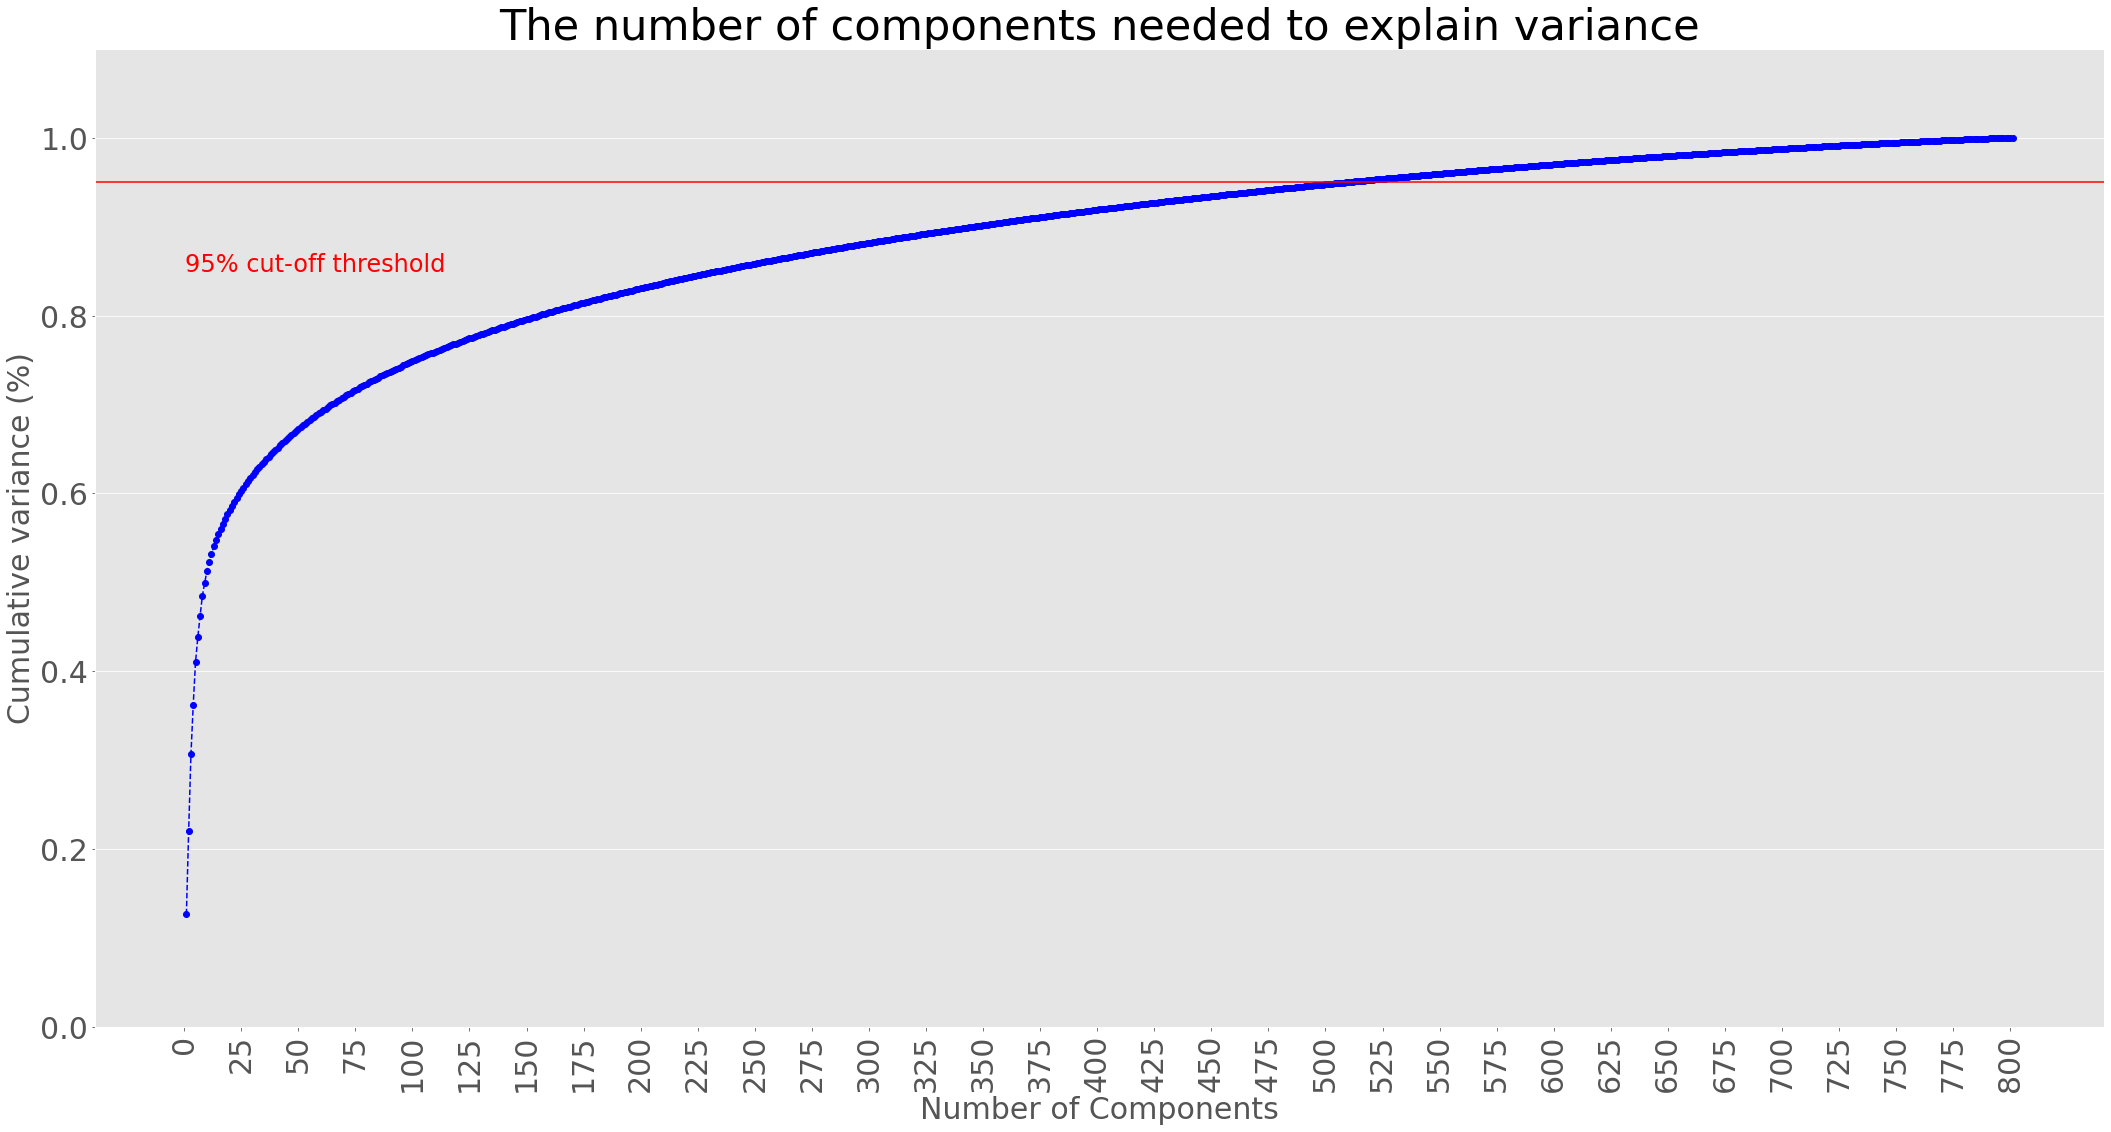

<Figure size 2592x1296 with 0 Axes>

In [ ]:

# % matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (36,18)  # (56, 36)

# creating a dictionary
font = {'size': 30}
  
# using rc function
plt.rc('font', **font)

fig, ax = plt.subplots()
xi = np.arange(1, 802, step=1)
y = np.cumsum(pca_801_fit.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components', fontsize=30)

plt.xticks(np.arange(0, 802, step=25), rotation=90) #change from 0-based array index to 1-based human-readable label


plt.ylabel('Cumulative variance (%)', fontsize=30)
plt.title('The number of components needed to explain variance')

# plt.setp(xi.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=24)

ax.grid(axis='x')
plt.show()
plt.savefig("clear_elbow_plot.png")

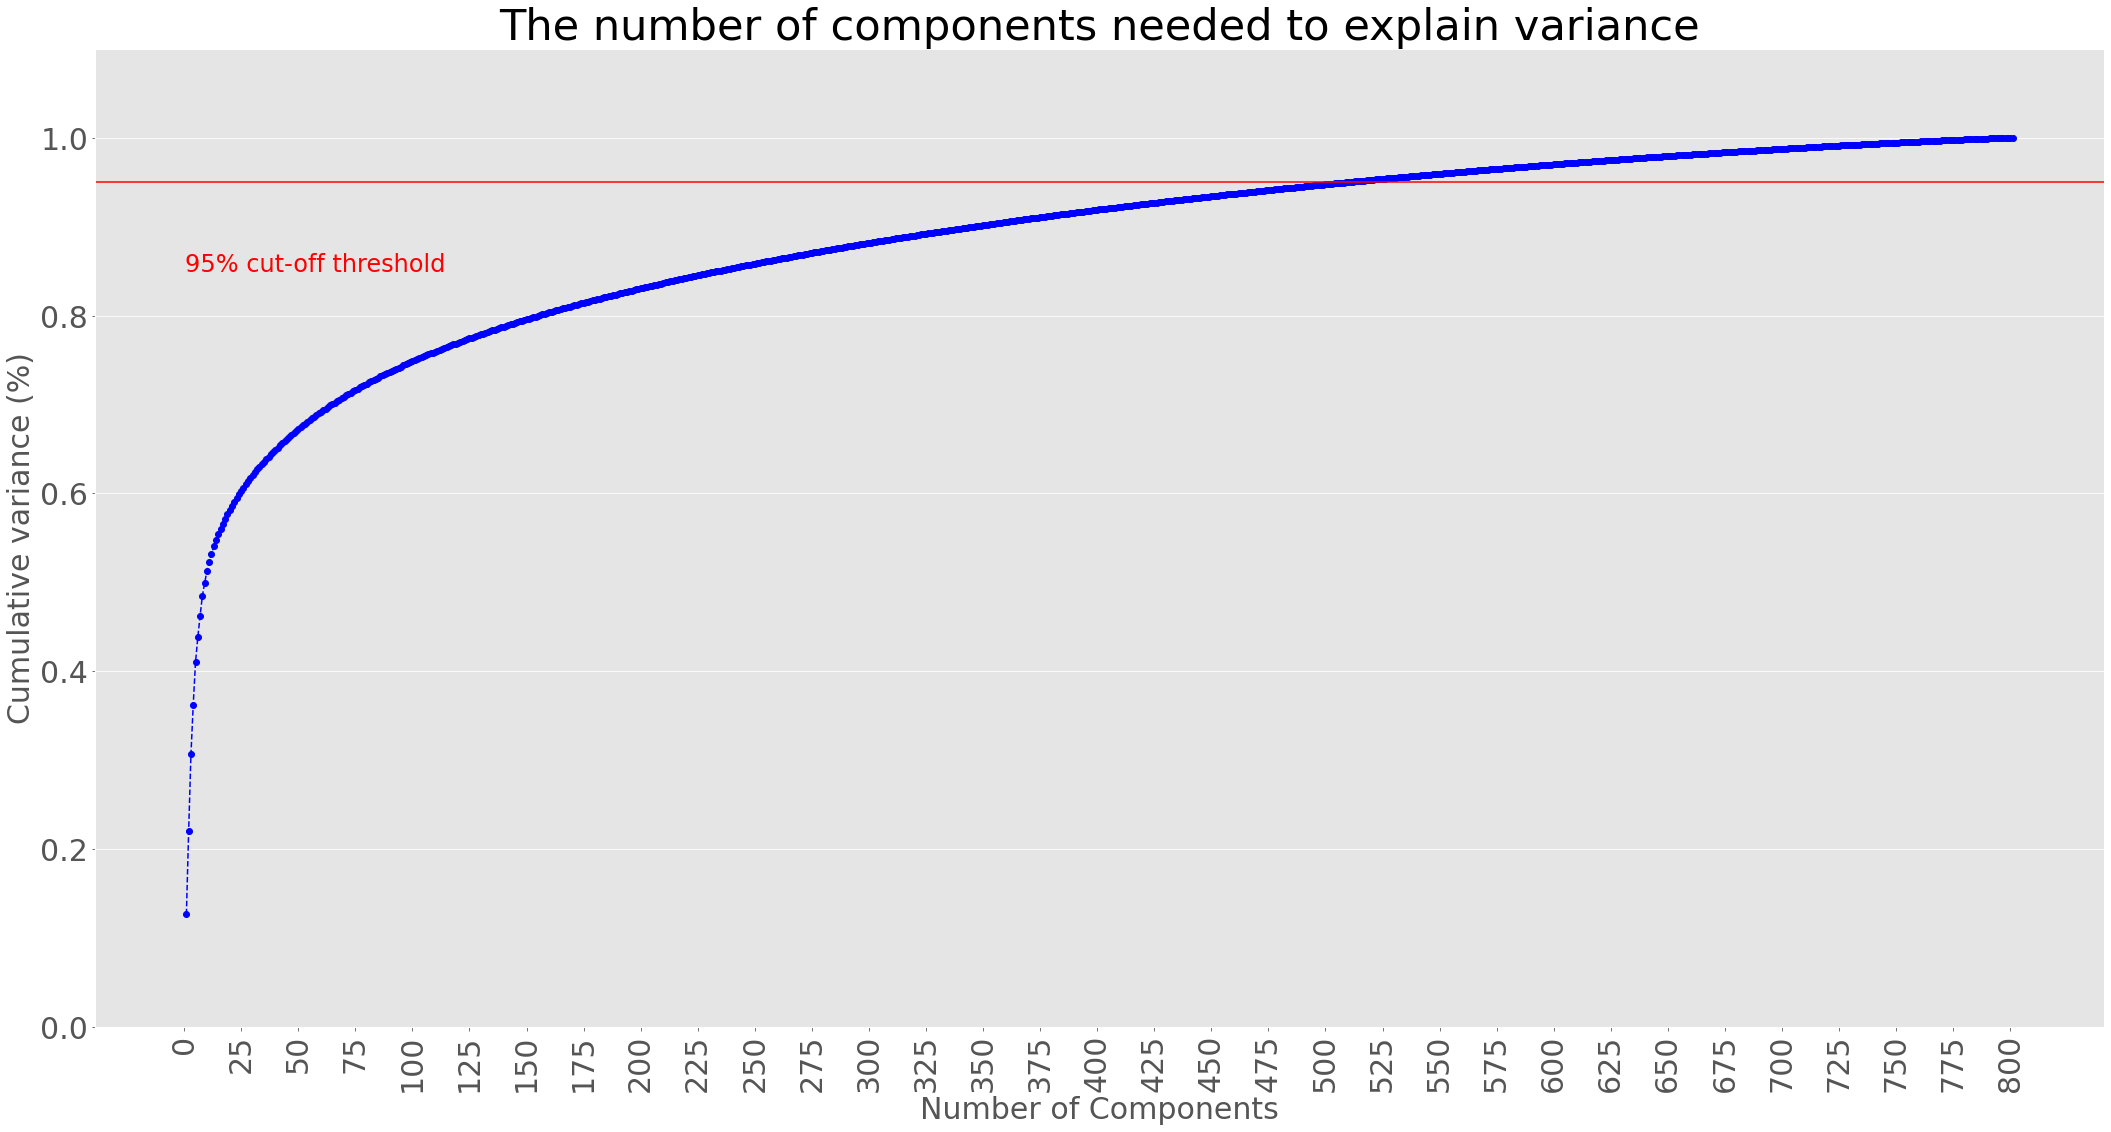

<Figure size 2592x1296 with 0 Axes>

In [ ]:

# % matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (36,18)  # (56, 36)

# creating a dictionary
font = {'size': 30}
  
# using rc function
plt.rc('font', **font)

fig, ax = plt.subplots()
xi = np.arange(1, 802, step=1)
y = np.cumsum(pca_801_fit.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components', fontsize=30)

plt.xticks(np.arange(0, 802, step=25), rotation=90) #change from 0-based array index to 1-based human-readable label


plt.ylabel('Cumulative variance (%)', fontsize=30)
plt.title('The number of components needed to explain variance')

# plt.setp(xi.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=24)

ax.grid(axis='x')
plt.show()
plt.savefig("clear_elbow_plot.png", dpi=100)

Dimensionality reduction using TSNE

Reference - https://www.youtube.com/watch?v=NEaUSP4YerM&t=625s

In [ ]:
df_tsne_data = master_data
non_numeric = ['Unnamed: 0','Class']
df_tsne_data = df_tsne_data.drop(non_numeric, axis=1)
df_tsne_data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [ ]:
#import T-SNE from sklearn
from sklearn.manifold import TSNE
m = TSNE(learning_rate=50)

In [ ]:
tnse_features = m.fit_transform(df_tsne_data)
tnse_features[1:4,:]

array([[ -0.38058293,   5.7427387 ],
       [-41.13399   ,  -1.4808235 ],
       [-40.317463  ,  -1.0385877 ]], dtype=float32)

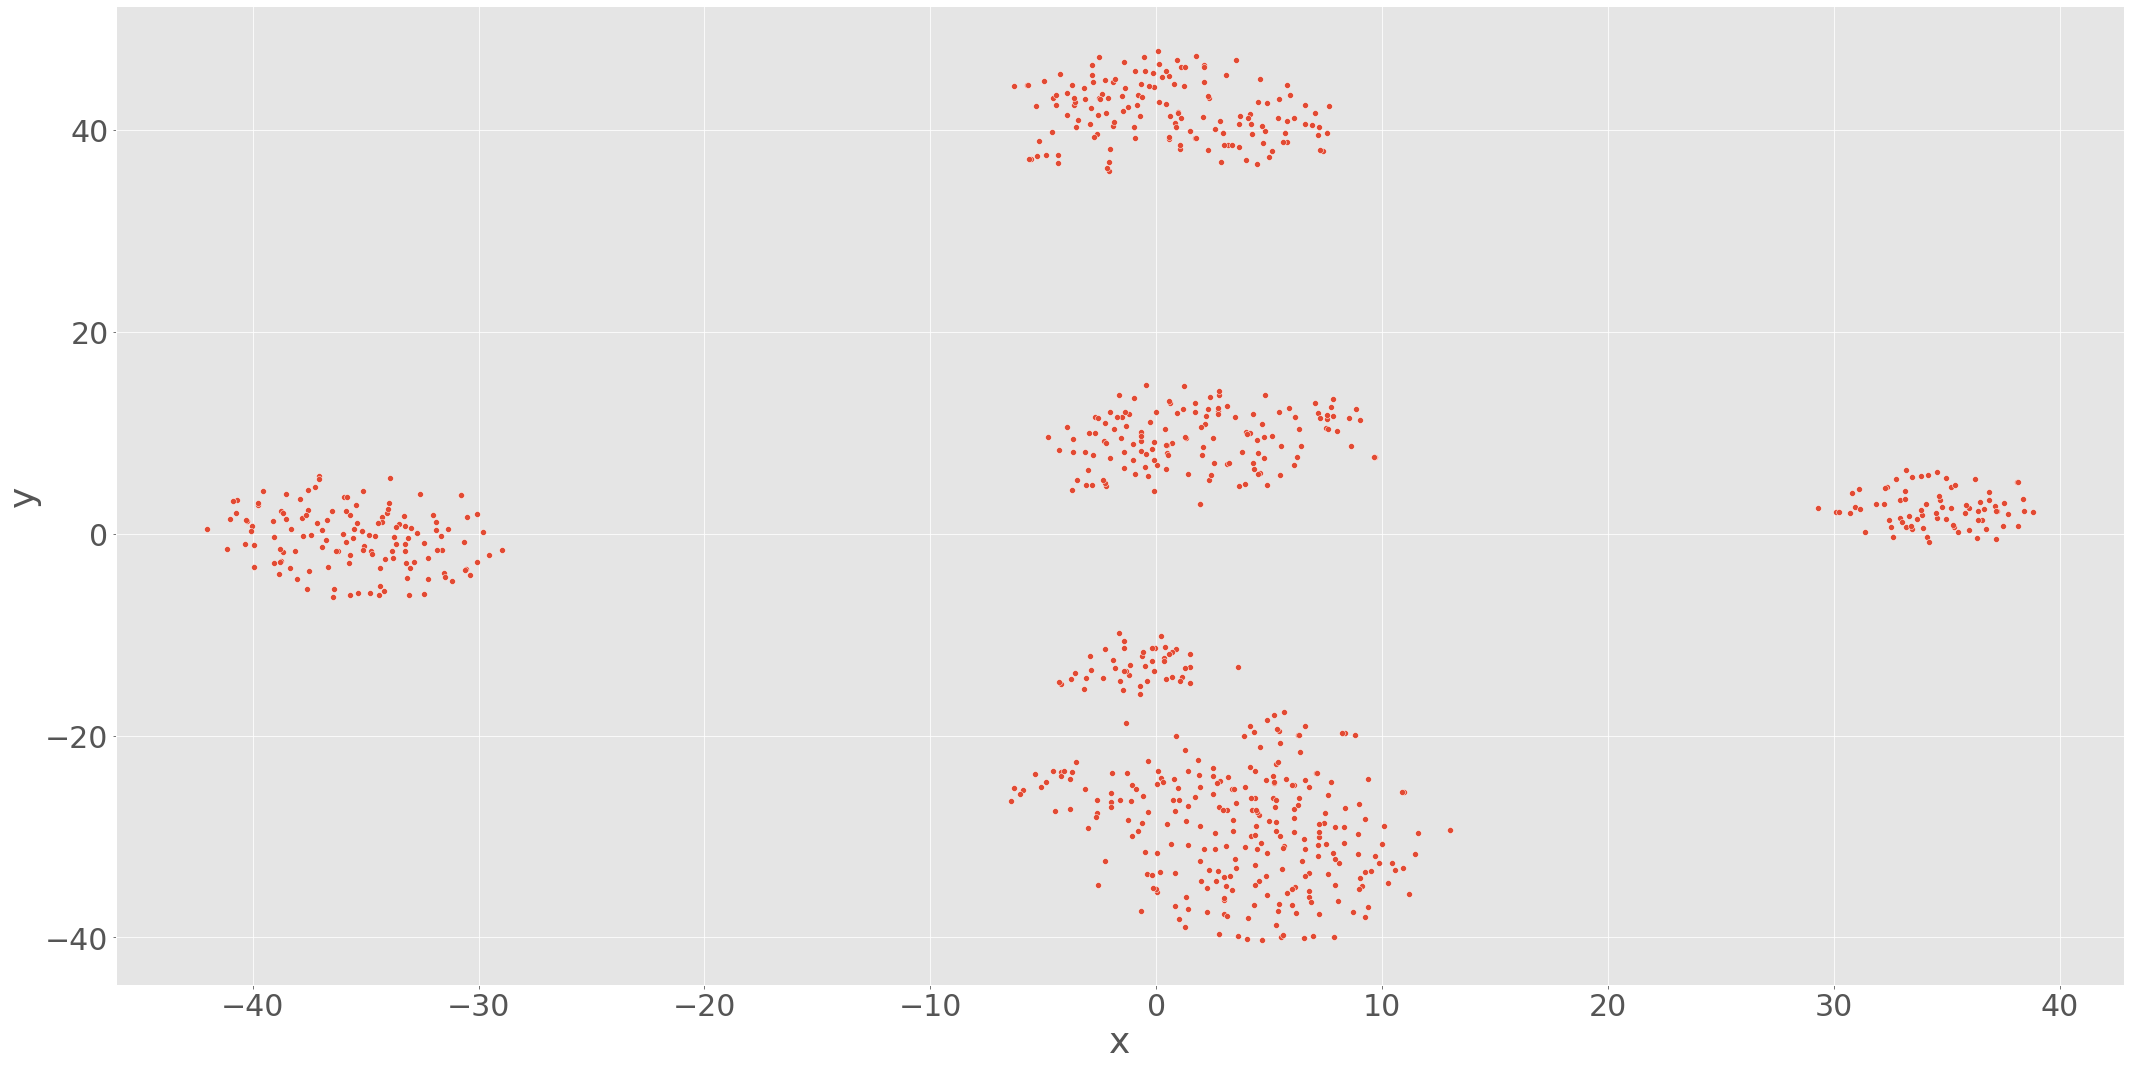

In [ ]:
df_tsne_data['x'] = tnse_features[:,0]
df_tsne_data['y'] = tnse_features[:,1]

import seaborn as sns
sns.scatterplot(x='x',y='y',data=df_tsne_data)
plt.show()

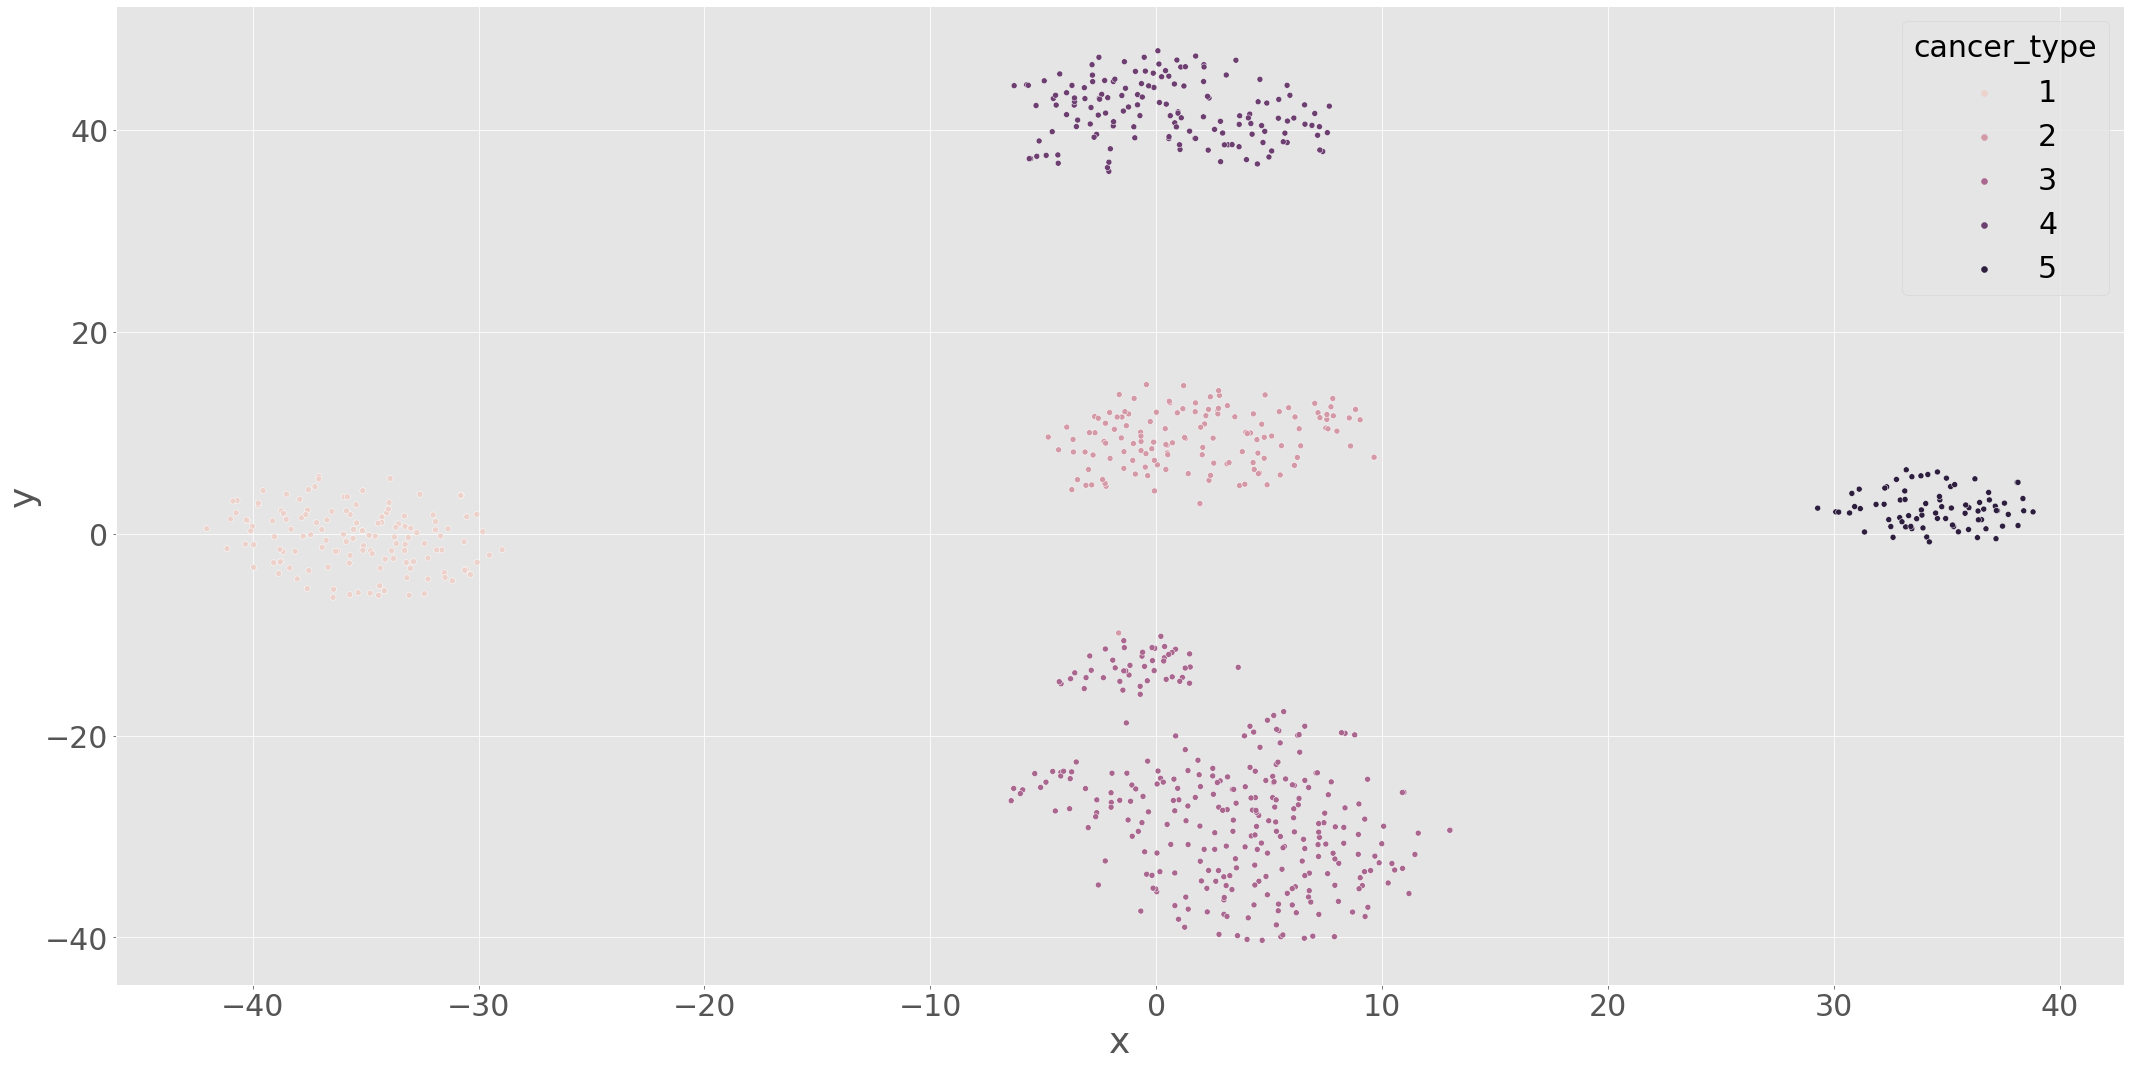

In [ ]:
df_tsne_data['cancer_type']=df_cat_data['Class']
sns.scatterplot(x='x',y='y',hue = 'cancer_type', data=df_tsne_data)
plt.show()

Dimensionality reduction using LDA

Reference - https://www.youtube.com/watch?v=azXCzI57Yfc

so doing LDA, because, there is a cluster which is distance and spread inside cluster. So LDA will explain both.

In [ ]:
df_lda = master_data.drop(['Unnamed: 0'], axis=1)
df_lda = df_lda.drop(['Class'], axis=1)
x_lda = df_lda
x_lda

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [ ]:
x_lda.shape

(801, 20531)

In [ ]:
y_lda = master_data['Class']
y_lda.values

array([1, 2, 1, 1, 3, 1, 4, 1, 3, 1, 3, 4, 1, 3, 3, 3, 2, 4, 4, 1, 3, 4,
       2, 3, 4, 2, 5, 3, 3, 3, 3, 3, 4, 3, 1, 3, 4, 2, 3, 3, 4, 1, 1, 4,
       4, 3, 1, 5, 3, 2, 3, 2, 3, 1, 5, 3, 3, 5, 4, 3, 2, 4, 3, 2, 1, 5,
       3, 1, 4, 3, 4, 3, 3, 2, 3, 2, 3, 4, 1, 5, 3, 1, 3, 3, 1, 1, 3, 3,
       4, 3, 1, 1, 3, 3, 3, 1, 5, 3, 1, 3, 3, 4, 3, 4, 2, 4, 2, 5, 2, 2,
       1, 3, 2, 1, 3, 4, 4, 4, 3, 3, 2, 4, 2, 3, 1, 1, 1, 3, 4, 2, 5, 3,
       5, 3, 3, 4, 2, 3, 4, 5, 3, 1, 3, 4, 2, 5, 1, 3, 2, 2, 2, 2, 3, 3,
       2, 3, 3, 1, 1, 2, 1, 2, 4, 3, 1, 2, 5, 4, 2, 3, 4, 2, 3, 2, 3, 3,
       3, 1, 3, 4, 5, 4, 3, 1, 1, 1, 2, 2, 3, 2, 2, 4, 2, 1, 2, 3, 3, 3,
       2, 2, 3, 4, 4, 4, 4, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 3, 3, 3, 2, 3,
       4, 2, 4, 4, 2, 3, 4, 1, 3, 2, 2, 1, 5, 3, 4, 1, 4, 5, 3, 4, 4, 2,
       1, 1, 2, 2, 4, 3, 3, 5, 3, 1, 5, 3, 1, 4, 1, 1, 1, 3, 5, 5, 2, 5,
       5, 1, 2, 3, 3, 4, 4, 3, 5, 1, 4, 1, 3, 3, 4, 3, 3, 3, 3, 2, 2, 3,
       3, 3, 4, 4, 4, 4, 3, 3, 3, 4, 3, 3, 2, 1, 3,

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
x_r2 = lda.fit(x_lda,y_lda).transform(x_lda)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [ ]:
lda.explained_variance_ratio_

array([0.36219022, 0.30156109])

In [ ]:
x_r3 = pd.DataFrame(data=x_r2)
x_r3['y']=y_lda
x_r3

,0,1,y
0,-7.958125,10.922818,1
1,-0.301563,-2.780898,2
2,-6.424952,8.870978,1
3,-6.934259,10.417199,1
4,-2.872004,-4.912284,3
...,...,...,...
796,-2.491183,-6.516482,3
797,0.217789,-1.859410,2
798,-1.426674,-0.474514,5
799,-7.800641,12.104337,1


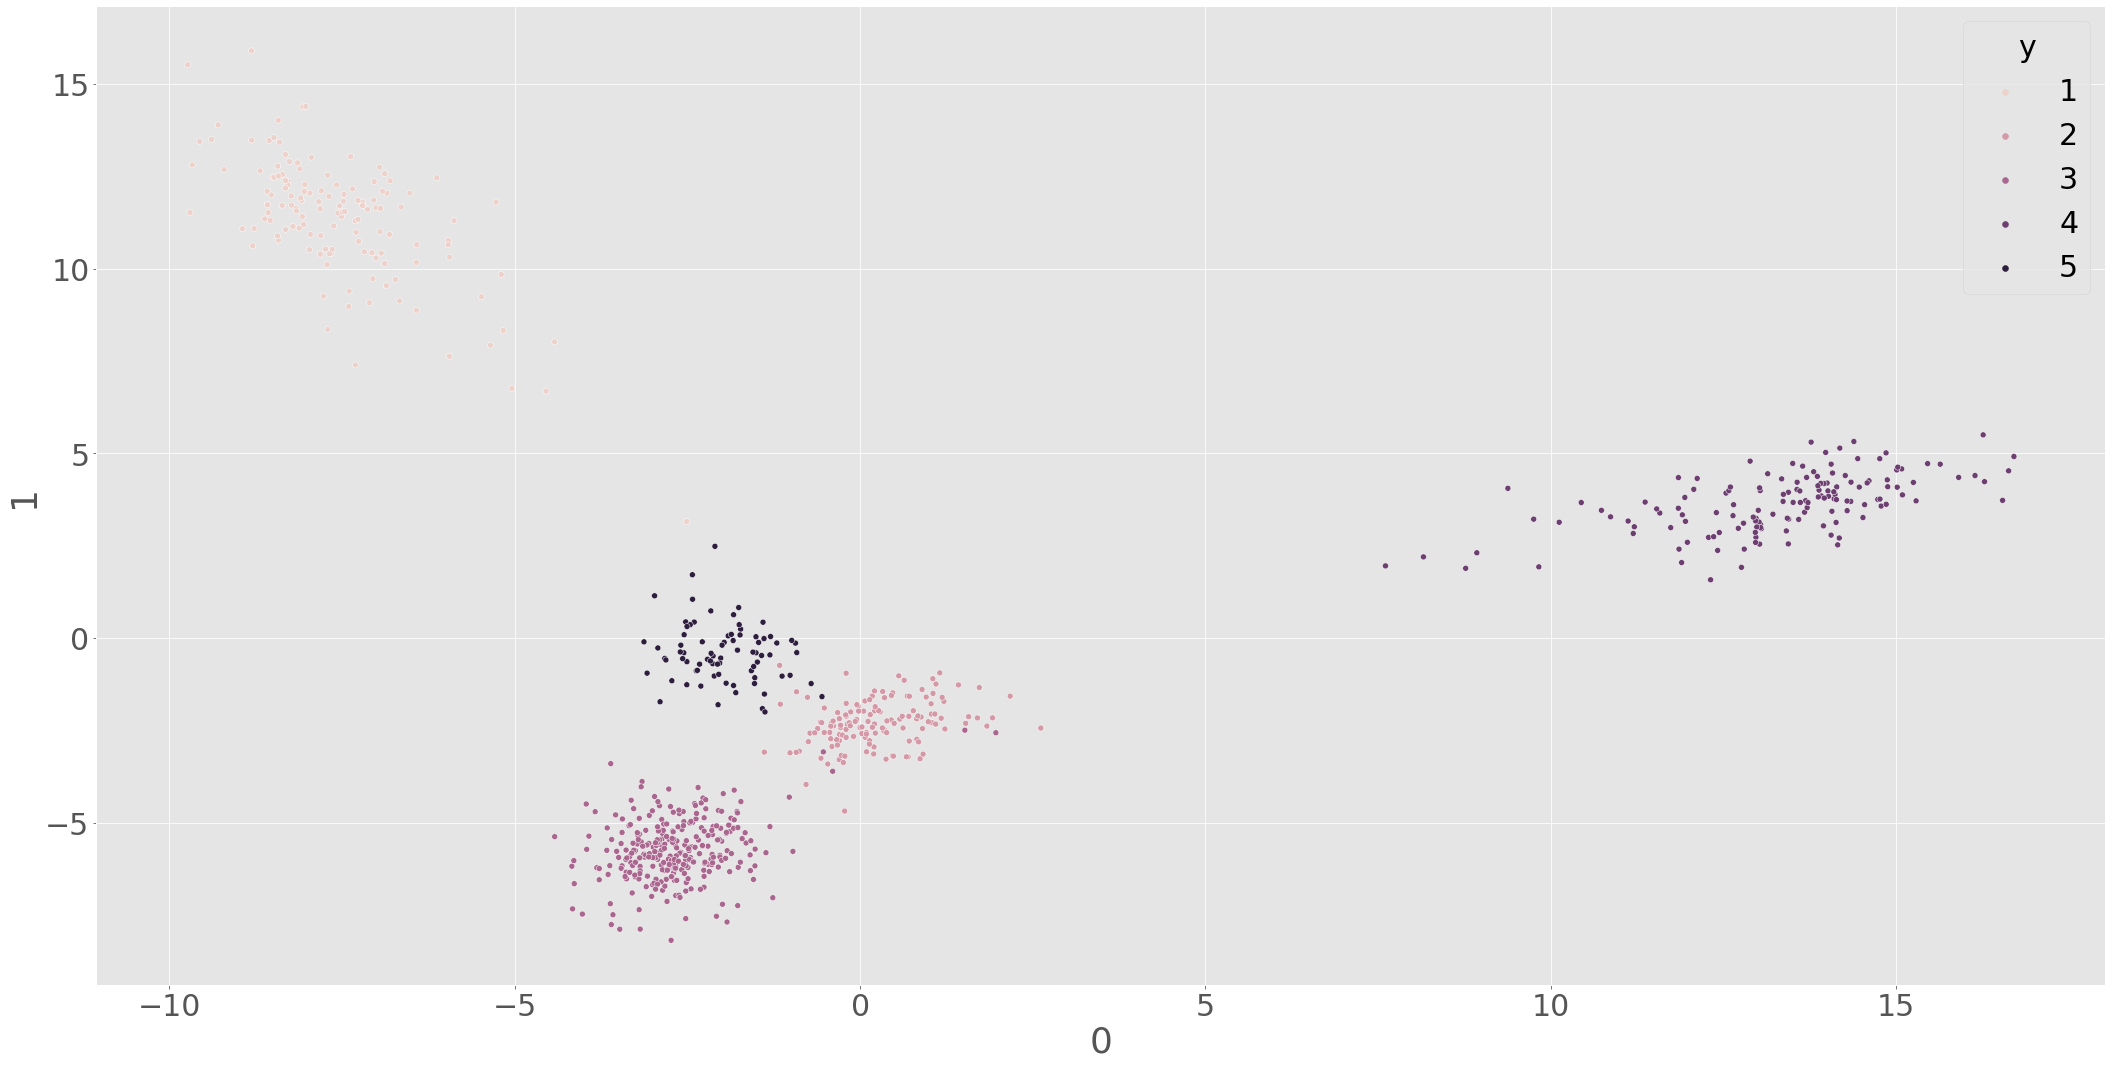

In [ ]:
sns.scatterplot(x=0,y=1,hue = 'y', data=x_r3)

KMEANS Clustering with PCA = 2

In [ ]:
from sklearn.cluster import KMeans
clusters = KMeans(5, n_init = 5)
clusters.fit(X_pca_with_2)

clusters.labels_

array([4, 1, 0, 0, 3, 1, 2, 1, 3, 0, 1, 2, 1, 4, 3, 3, 1, 2, 2, 0, 3, 1,
       1, 0, 2, 1, 0, 3, 1, 3, 3, 3, 2, 4, 0, 3, 2, 1, 1, 4, 2, 0, 1, 2,
       2, 3, 4, 0, 3, 1, 3, 0, 3, 1, 0, 0, 3, 0, 2, 1, 1, 1, 3, 1, 0, 0,
       1, 0, 2, 0, 2, 1, 0, 1, 3, 0, 3, 4, 1, 0, 3, 1, 3, 3, 4, 1, 3, 0,
       2, 0, 0, 0, 3, 4, 3, 0, 0, 3, 3, 1, 3, 2, 3, 2, 1, 2, 0, 0, 0, 3,
       4, 3, 1, 1, 3, 2, 2, 2, 3, 3, 1, 2, 1, 0, 1, 1, 0, 3, 2, 0, 0, 0,
       4, 1, 3, 2, 2, 3, 2, 0, 3, 0, 3, 2, 1, 0, 4, 3, 1, 0, 1, 1, 3, 3,
       1, 1, 3, 1, 0, 1, 4, 1, 2, 1, 1, 1, 0, 2, 1, 3, 2, 1, 3, 0, 3, 0,
       1, 1, 3, 2, 0, 2, 3, 1, 0, 1, 1, 1, 3, 1, 1, 2, 4, 3, 1, 3, 4, 3,
       0, 1, 3, 2, 2, 2, 2, 3, 4, 0, 1, 1, 1, 3, 1, 0, 1, 3, 3, 3, 1, 1,
       2, 1, 2, 2, 1, 3, 2, 0, 3, 1, 4, 3, 0, 4, 2, 1, 2, 0, 1, 2, 2, 3,
       0, 1, 1, 1, 2, 3, 3, 0, 3, 0, 1, 3, 1, 2, 4, 1, 1, 3, 1, 0, 3, 0,
       0, 0, 3, 0, 3, 2, 2, 3, 0, 4, 2, 1, 3, 3, 2, 3, 3, 3, 4, 1, 1, 3,
       3, 3, 2, 2, 2, 2, 4, 3, 3, 2, 3, 3, 1, 1, 1,

In [ ]:
pca_with_2_data_frame = pd.DataFrame(data=X_pca_with_2,columns=['pca1','pca2'])
pca_with_2_data_frame.head()

,pca1,pca2
0,-57.446987,95.410981
1,-16.919430,0.732470
2,-70.345218,-19.303327
3,-49.161591,-9.227586
4,-18.132534,-51.327797


In [ ]:
pca_with_2_data_frame['Cls_label'] = clusters.labels_
pca_with_2_data_frame['given_cancer_type'] = label.Class.values
pca_with_2_data_frame

,pca1,pca2,Cls_label,given_cancer_type
0,-57.446987,95.410981,4,PRAD
1,-16.919430,0.732470,1,LUAD
2,-70.345218,-19.303327,0,PRAD
3,-49.161591,-9.227586,0,PRAD
4,-18.132534,-51.327797,3,BRCA
...,...,...,...,...
796,-12.417385,-42.321574,3,BRCA
797,-29.415554,28.526281,0,LUAD
798,-4.133090,15.690014,1,COAD
799,-30.814757,33.526423,0,PRAD


In [ ]:
clusters.cluster_centers_

array([[-45.20369136,  15.07808379],
       [ -2.06263931,   6.32719153],
       [ 80.93171918,  32.80898515],
       [ -2.18176324, -51.4499728 ],
       [-60.32075428,  74.65389731]])

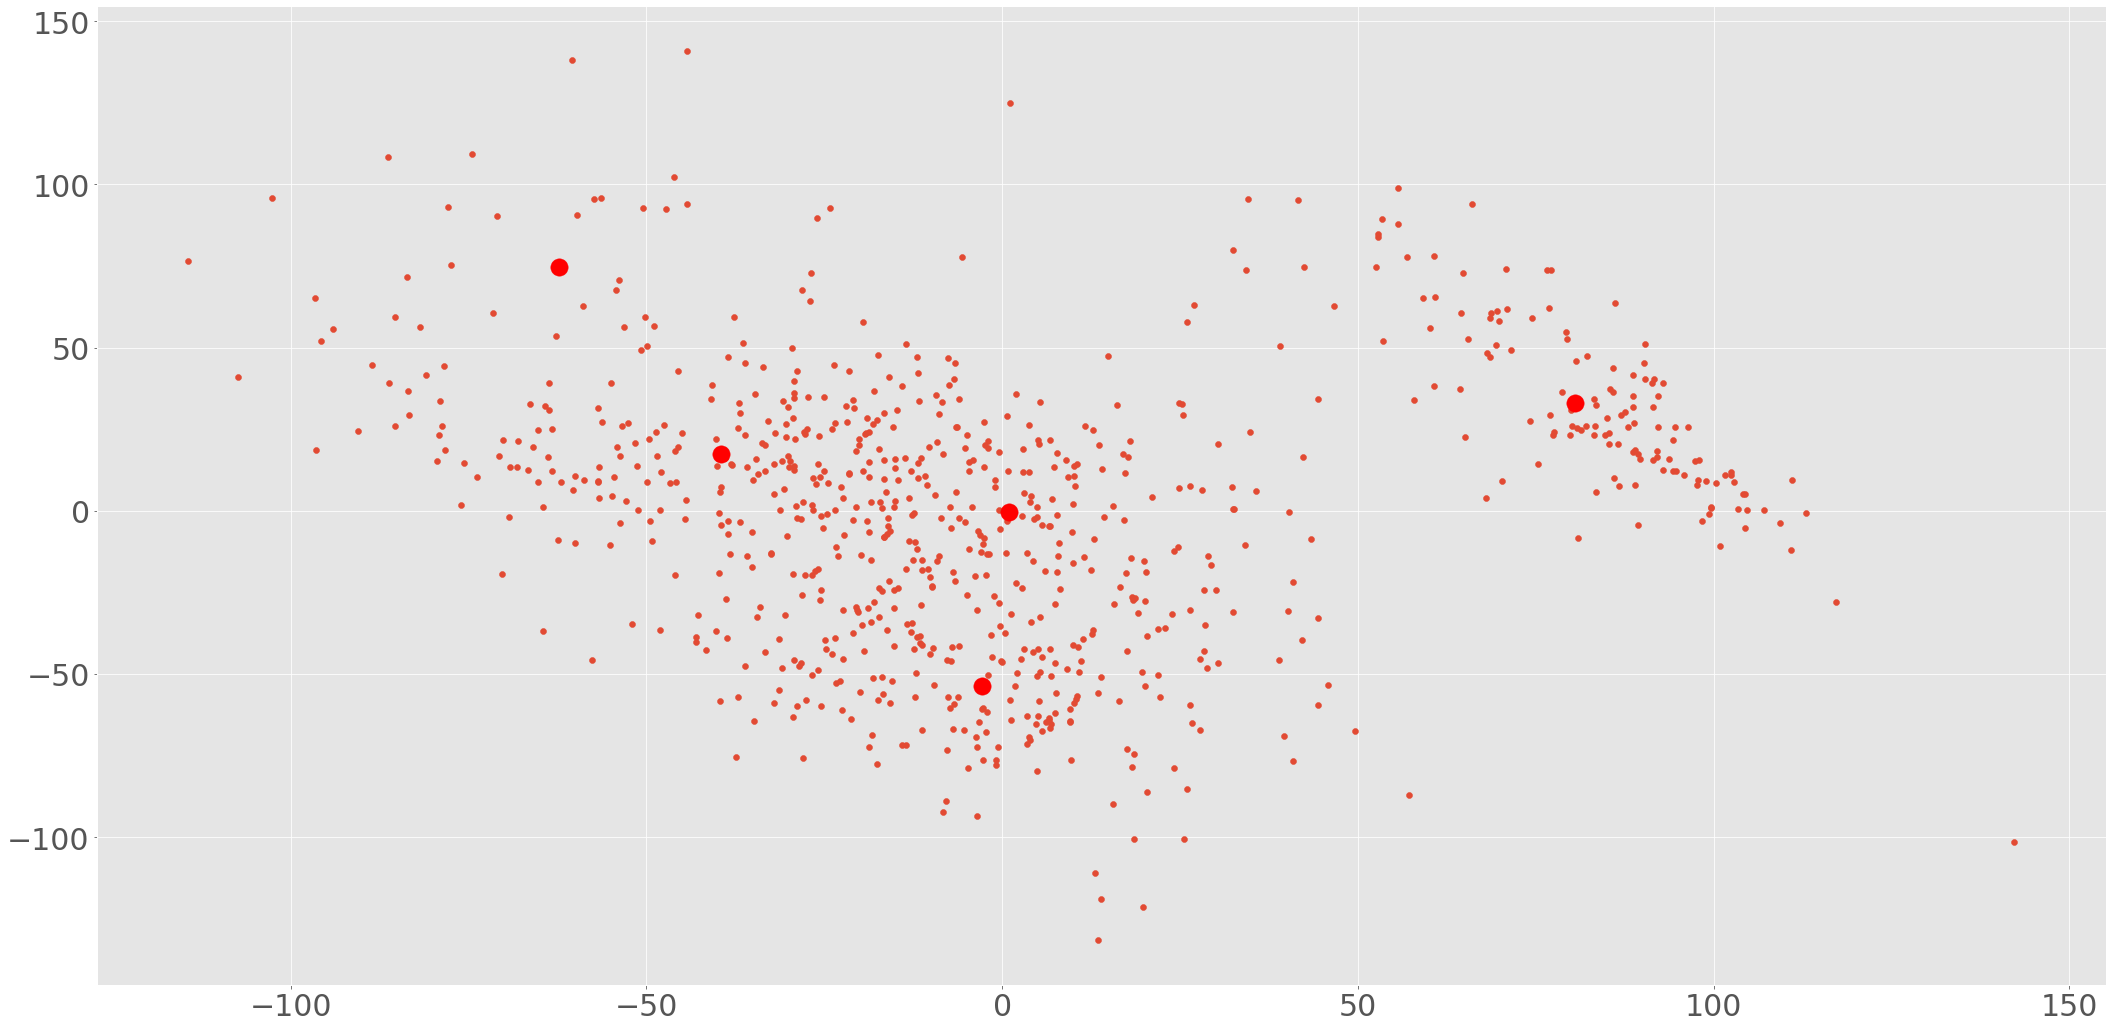

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_pca_with_2)
plt.scatter(X_pca_with_2[:,0], X_pca_with_2[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# ***KMEANS Clustering with PCA = .995***

In [ ]:
from sklearn.cluster import KMeans
clusters_995 = KMeans(5, n_init = 5)
clusters_995.fit(X_pca_with_995)
clusters_995.labels_

array([4, 0, 4, 4, 3, 4, 1, 4, 3, 4, 3, 1, 4, 3, 3, 3, 0, 1, 1, 4, 3, 1,
       0, 3, 1, 0, 2, 3, 3, 3, 3, 3, 1, 3, 4, 3, 1, 0, 3, 3, 1, 4, 4, 1,
       1, 3, 4, 2, 3, 0, 3, 0, 3, 4, 2, 3, 3, 2, 1, 3, 0, 3, 3, 0, 4, 2,
       3, 4, 1, 3, 1, 3, 3, 0, 3, 0, 3, 1, 4, 2, 3, 4, 3, 3, 4, 4, 3, 3,
       1, 3, 4, 4, 3, 3, 3, 4, 2, 3, 4, 3, 3, 1, 3, 1, 0, 1, 0, 2, 0, 0,
       4, 3, 0, 4, 3, 1, 1, 1, 3, 3, 0, 1, 0, 3, 4, 4, 4, 3, 1, 3, 2, 3,
       2, 3, 3, 1, 0, 3, 1, 2, 3, 4, 3, 1, 0, 2, 4, 3, 0, 0, 0, 0, 3, 3,
       0, 3, 3, 4, 4, 0, 4, 0, 1, 3, 4, 0, 2, 1, 0, 3, 1, 0, 3, 0, 3, 3,
       3, 4, 3, 1, 2, 1, 3, 4, 4, 4, 0, 0, 3, 0, 0, 1, 0, 4, 0, 3, 3, 3,
       0, 0, 3, 1, 1, 1, 1, 4, 3, 4, 3, 0, 0, 3, 4, 3, 4, 3, 3, 3, 0, 3,
       1, 0, 1, 1, 0, 3, 1, 4, 3, 0, 0, 4, 2, 3, 1, 4, 1, 2, 3, 1, 1, 0,
       4, 4, 0, 0, 1, 3, 3, 2, 3, 4, 0, 3, 4, 1, 4, 4, 4, 3, 2, 2, 0, 2,
       2, 4, 0, 3, 3, 1, 1, 3, 2, 4, 1, 4, 3, 3, 1, 3, 3, 3, 3, 0, 0, 3,
       3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 0, 4, 3,

In [ ]:
pca_with_995_data_frame = pd.DataFrame(data=X_pca_with_995)
pca_with_995_data_frame.head()
pca_with_995_data_frame['Cls_label'] = clusters.labels_
pca_with_995_data_frame['given_cancer_type'] = label.Class.values

In [ ]:
pca_with_995_data_frame.head(5)

,0,1,2,3,4,5,6,7,8,9,...,739,740,741,742,743,744,745,746,Cls_label,given_cancer_type
0,-62.755415,-94.071973,89.519831,-15.942567,81.423539,-13.998292,7.716073,-22.936551,-32.837892,-2.202680,...,-0.626193,-1.265756,-0.017984,-2.740860,0.944037,3.092581,0.713598,-0.082122,4,PRAD
1,-2.432896,90.585842,-1.067308,-53.083120,-15.676684,60.842472,10.257369,-48.822959,14.257400,-12.214352,...,-0.593678,-0.403462,1.181537,0.490910,0.197768,0.013967,-0.395176,-0.949947,1,LUAD
2,-71.266853,-8.064608,66.112455,81.381475,-7.525685,109.824273,5.519407,-13.364480,38.415728,-5.124731,...,0.328453,0.004078,0.363928,-1.109210,0.331488,0.128899,-0.264530,0.384594,0,PRAD
3,-84.770785,-73.244566,74.181000,27.022697,-18.044895,50.116433,-3.495197,-11.318520,8.319656,-3.149509,...,0.652455,-3.624900,-1.203028,-2.347912,1.577992,-0.781748,0.120442,-0.057973,0,PRAD
4,-69.560171,-9.612940,-67.497549,34.868543,-1.795849,-6.676780,-2.840781,16.780157,-49.319753,10.508631,...,2.767486,-0.631562,-0.794275,-0.514008,-1.875969,-2.526109,-1.073803,-1.161728,3,BRCA


In [ ]:
pca_with_995_data_frame.shape

(801, 749)

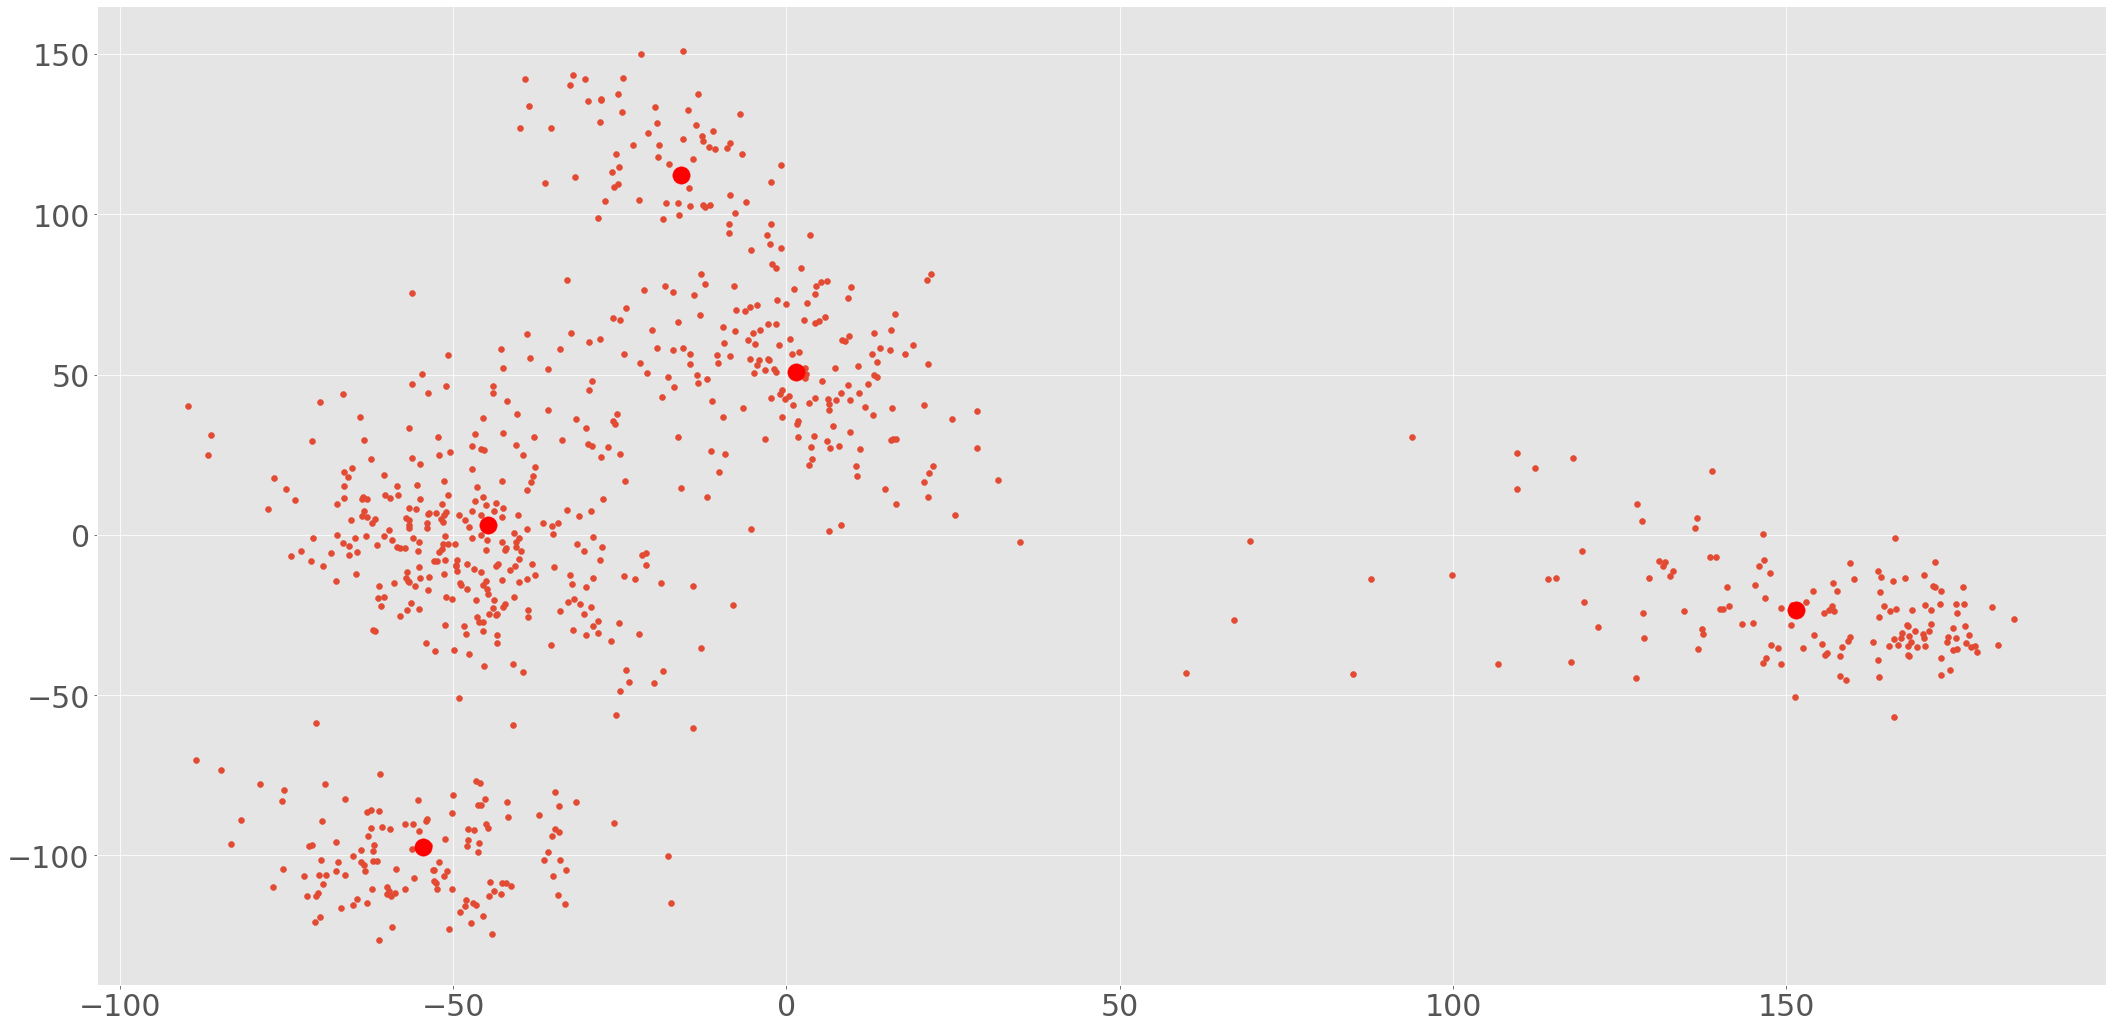

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_pca_with_995)
plt.scatter(X_pca_with_995[:,0], X_pca_with_995[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# ***Elbow method***

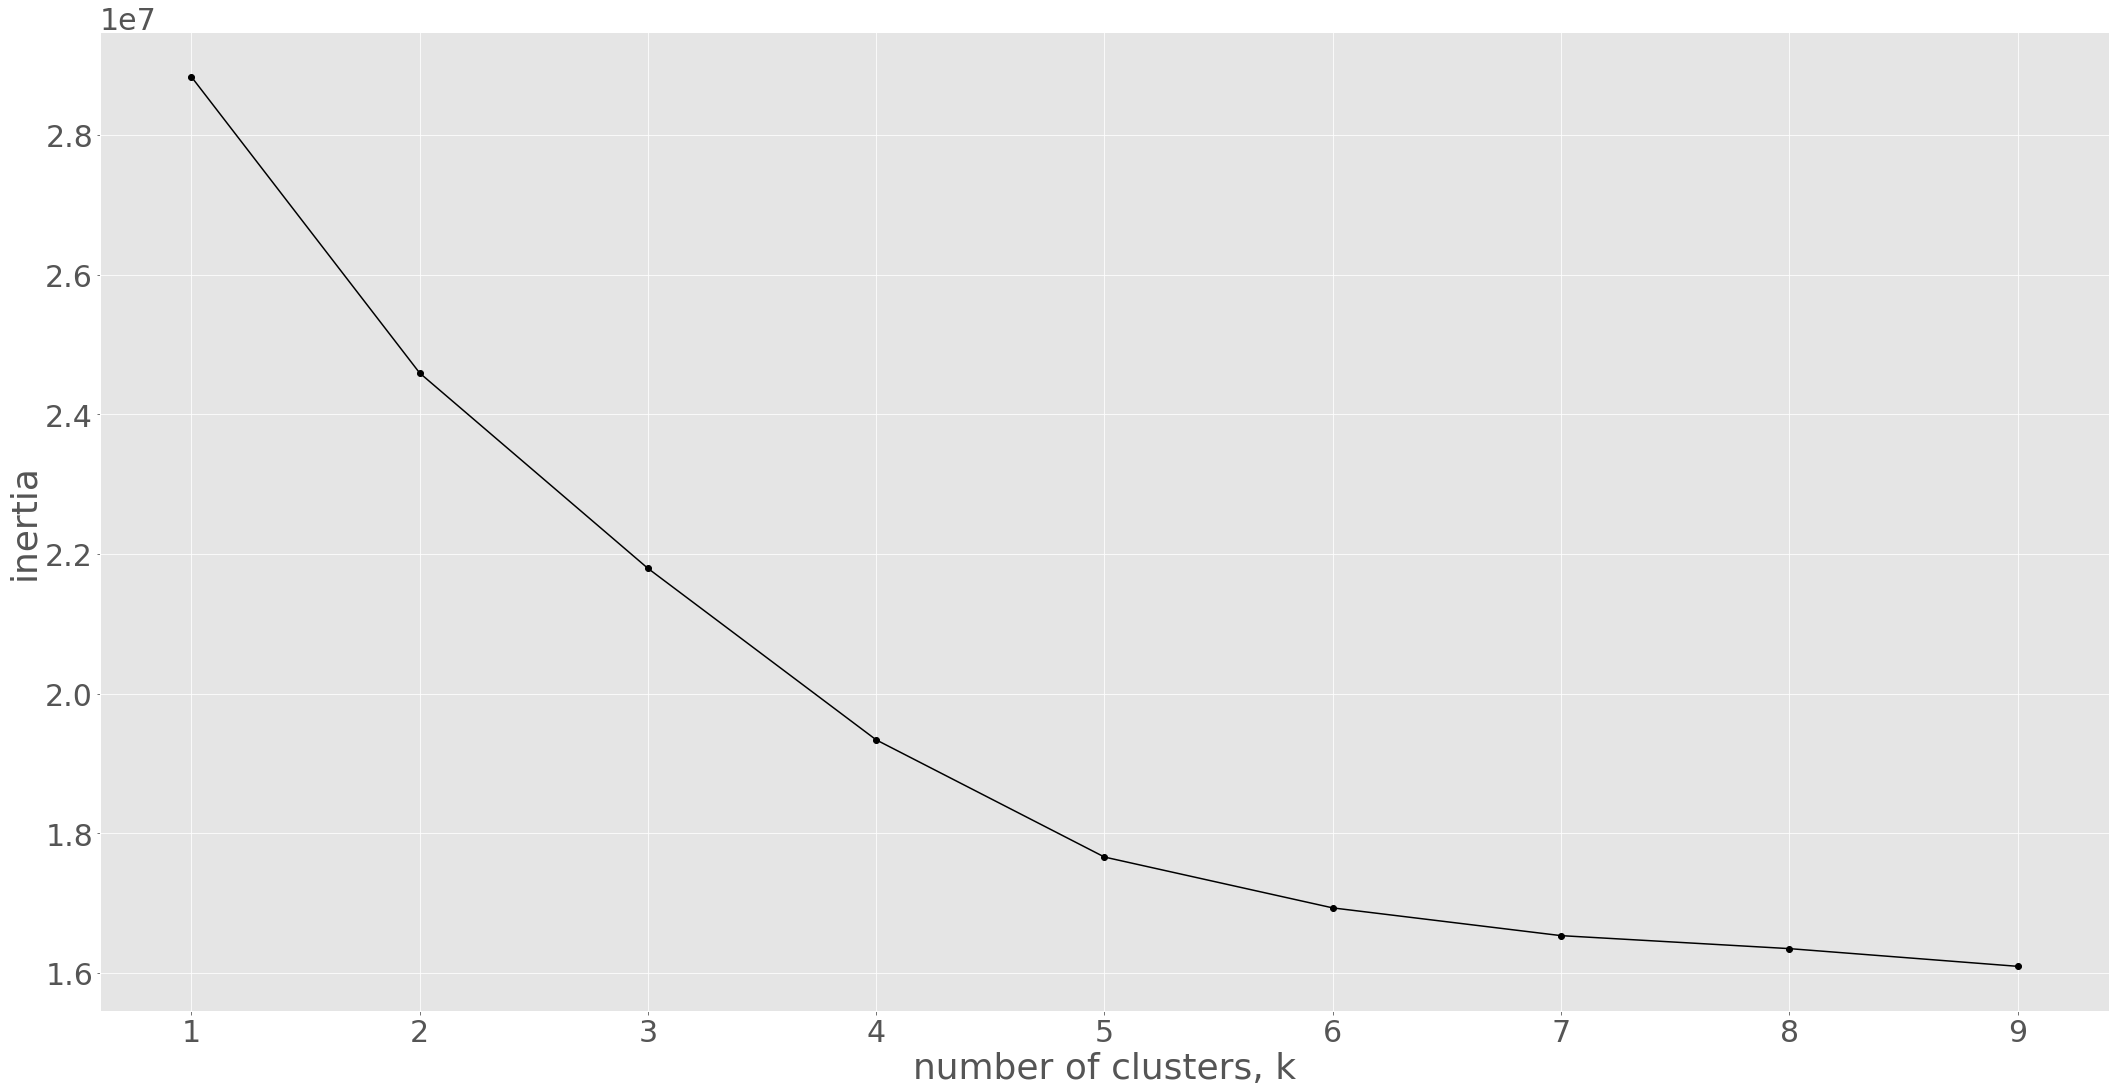

In [ ]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df_pca_995)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Build Classification Models

BUILDING AND RUNNING MANY ALGORITHMS AT ONCE

Reference - https://www.youtube.com/watch?v=7uLzGRlXXDw&list=PL9z-nia3KLoTBbK5ATeZnWMejwnIlVEPa&index=11

In [ ]:
ml_x = x_lda
ml_y = y_lda
ml_x.shape,ml_y.shape
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ml_x,ml_y,test_size=0.30,random_state=30)

In [ ]:
ml_x.head(5)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
ml_y.head(5)

0    1
1    2
2    1
3    1
4    3
Name: Class, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, \
            precision_score, recall_score, f1_score, roc_auc_score, roc_curve # ConfusionMatrixDisplay

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5), 
    "Support Vector Classifier":SVC(probability=True, kernel='rbf'),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100), 
    "Gaussian Naive Bayes": GaussianNB(),
    "K-Nearest Neighbour": KNeighborsClassifier(n_neighbors=5)
}


for i in range(len(list(models))):
  print(i)
  model = list(models.values())[i]
  model.fit(ml_x, ml_y) # train on LDA dataframe

  # Make predictions
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  # Traning set performance
  model_train_accuracy = accuracy_score(y_train, y_train_pred)
  model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
  model_train_precision = precision_score(y_train, y_train_pred, average='micro')
  model_train_recall = recall_score(y_train, y_train_pred, average='micro')
  

 # Testing set performance
  model_test_accuracy = accuracy_score(y_test, y_test_pred)
  model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
  model_test_precision = precision_score(y_test, y_test_pred, average='micro')
  model_test_recall = recall_score(y_test, y_test_pred, average='micro')
  
  print(list(models.keys())[i])

  # Model Train
  print('Model performance for Traning set')
  print("- Accuracy: {:.4f}".format(model_train_accuracy))
  print("- F1 Score: {:.4f}".format(model_train_f1))
  print("- Precision: {:.4f}".format(model_train_precision))
  print("- Recall: {:.4f}".format(model_train_recall))

  print("---------------------------------------------------------------")

  # Model Test
  print('Model performance for Testing set')
  print("- Accuracy: {:.4f}".format(model_test_accuracy))
  print("- F1 Score: {:.4f}".format(model_test_f1))
  print("- Precision: {:.4f}".format(model_test_precision))
  print("- Recall: {:.4f}".format(model_test_recall))


  print("="*35)
  print("\n")

0
Decision Tree
Model performance for Traning set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
---------------------------------------------------------------
Model performance for Testing set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000


1
Support Vector Classifier
Model performance for Traning set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
---------------------------------------------------------------
Model performance for Testing set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000


2
Random Forest Classifier
Model performance for Traning set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
---------------------------------------------------------------
Model performance for Testing set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000


3
Gaussian Naive Bayes
Model performance for Traning set
- Accuracy: 1.0000
-

In [ ]:
rf_params = {
             "max_depth": [5, 8, 15, None, 10], 
             "max_features": [5, 7, "auto", 8], 
             "min_samples_split": [2, 8, 15, 20], 
             "n_estimators": [100, 200, 500, 1000], 
             }

In [ ]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [ ]:
randomcv_models = [
                  ("RF", RandomForestClassifier(), rf_params)                   
                   ]

In [ ]:
randomcv_models

[('RF',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators='warn',
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
  random = RandomizedSearchCV(estimator=model,
                              param_distributions=params,
                              n_iter=100,
                              cv=3,
                              verbose=2,
                              n_jobs=-1)
  random.fit(x_train, y_train)
  model_param[name] = random.best_params_

for model_name in model_param:
  print(f"--------------- Best param for {model_name} ---------------")
  print(model_param[model_name])


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.5min finished


--------------- Best param for RF ---------------
{'n_estimators': 100, 'min_samples_split': 20, 'max_features': 'auto', 'max_depth': 15}


In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=1000, min_samples_split = 15 , 
                                           max_features = "auto", max_depth = None)
}

for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(x_train, y_train) # Train Model

  # Make predictions
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)


  # Training set performance
  model_train_accuracy = accuracy_score(y_train, y_train_pred)
  model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
  model_train_precision = precision_score(y_train, y_train_pred, average='micro')
  model_train_recall = recall_score(y_train, y_train_pred, average='micro')

  # Testing set performance
  model_test_accuracy = accuracy_score(y_test, y_test_pred)
  model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
  model_test_precision = precision_score(y_test, y_test_pred, average='micro')
  model_test_recall = recall_score(y_test, y_test_pred, average='micro')

  print(list(models.keys())[i])

  # Model Train
  print('Model performance for Traning set')
  print("- Accuracy: {:.4f}".format(model_train_accuracy))
  print("- F1 Score: {:.4f}".format(model_train_f1))
  print("- Precision: {:.4f}".format(model_train_precision))
  print("- Recall: {:.4f}".format(model_train_recall))

  print("---------------------------------------------------------------")

  # Model Test
  print('Model performance for Testing set')
  print("- Accuracy: {:.4f}".format(model_test_accuracy))
  print("- F1 Score: {:.4f}".format(model_test_f1))
  print("- Precision: {:.4f}".format(model_test_precision))
  print("- Recall: {:.4f}".format(model_test_recall))


  print("="*35)
  print("\n")  

Random Forest
Model performance for Traning set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
---------------------------------------------------------------
Model performance for Testing set
- Accuracy: 0.9917
- F1 Score: 0.9917
- Precision: 0.9917
- Recall: 0.9917




# ***DEEP NEURAL NETWORK***

In [ ]:
!wget https://www.dropbox.com/sh/8q39v4rvo9hq7hy/AAAfAs9J12eevM_9_jPySJ1xa?dl=0

--2022-09-17 10:03:50--  https://www.dropbox.com/sh/8q39v4rvo9hq7hy/AAAfAs9J12eevM_9_jPySJ1xa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/8q39v4rvo9hq7hy/AAAfAs9J12eevM_9_jPySJ1xa [following]
--2022-09-17 10:03:51--  https://www.dropbox.com/sh/raw/8q39v4rvo9hq7hy/AAAfAs9J12eevM_9_jPySJ1xa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca72f22e353d4299b595d7a3e63.dl.dropboxusercontent.com/zip_download_get/BQi15JCy82HYMxgiUSypUHWMIaJLq7E6HIRod7ybXZfL_JzGxOXnHyWW9FxAJMuFjNAlmqEj_GARKWjUnwYCtnAYwN1EObKXO-5METrblkDmLw# [following]
--2022-09-17 10:03:51--  https://uca72f22e353d4299b595d7a3e63.dl.dropboxusercontent.com/zip_download_get/BQi15JCy82HYMxgiUSypUHWMIaJLq7E6HIRod7ybXZfL_JzGxOXnHyWW9FxAJMuFjNAlmqEj_GARKWjUnwYCtnAYw

In [ ]:
!unzip -qq /content/AAAfAs9J12eevM_9_jPySJ1xa?dl=0

mapname:  conversion of  failed
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y

1 archive had fatal errors.


In [ ]:
!pip install scikit-learn==0.21.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow==2.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [ ]:
import sys
import csv

csv.field_size_limit(sys.maxsize)

9223372036854775807

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5245237932281739182, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17797237073633515140
 physical_device_desc: "device: XLA_CPU device"]

In [ ]:
!cat /proc/meminfo

MemTotal:       13297220 kB
MemFree:         5183100 kB
MemAvailable:    7943636 kB
Buffers:           67868 kB
Cached:          2449300 kB
SwapCached:            0 kB
Active:          3357100 kB
Inactive:        4536088 kB
Active(anon):    2658640 kB
Inactive(anon):  2281216 kB
Active(file):     698460 kB
Inactive(file):  2254872 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              2968 kB
Writeback:             0 kB
AnonPages:       5375548 kB
Mapped:           481072 kB
Shmem:             22208 kB
KReclaimable:     101660 kB
Slab:             136344 kB
SReclaimable:     101660 kB
SUnreclaim:        34684 kB
KernelStack:        4992 kB
PageTables:        25908 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648608 kB
Committed_AS:   10640636 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        9812 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
label = pd.read_csv('/content/labels.csv', delimiter=',', engine='python')
data = pd.read_csv('/content/data.csv', delimiter=',', engine='python')
data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

In [ ]:
# Merge both the datasets
master_data = pd.merge(data, label)
master_data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [ ]:
deep_learning_data = master_data

In [ ]:
features=deep_learning_data.drop(['Unnamed: 0'],axis=1)
features=features.drop(['Class'],axis=1)
target=deep_learning_data['Class']
features.head(5)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
target.head(5)

0    PRAD
1    LUAD
2    PRAD
3    PRAD
4    BRCA
Name: Class, dtype: object

In [ ]:
x=features
x.head(5)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
y = deep_learning_data['Class']

In [ ]:
y.head(5)

0    PRAD
1    LUAD
2    PRAD
3    PRAD
4    BRCA
Name: Class, dtype: object

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
master_data.shape

(801, 20533)

In [ ]:
deep_learning_data.shape

(801, 20533)

In [ ]:
print(x.shape)
print(y.shape)

(801, 20531)
(801,)


In [ ]:
trainX.head(5)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
616,0.0,5.257467,3.658154,7.475920,10.532229,0.0,6.581443,0.000000,0.0,0.0,...,5.898494,9.431353,10.331006,8.580372,10.036847,11.432338,10.221418,11.005996,5.364131,0.0
329,0.0,3.972858,3.368908,6.644179,9.361722,0.0,8.306344,0.431142,0.0,0.0,...,6.431859,9.140965,10.624622,4.984161,9.985159,12.167415,10.983450,9.210472,10.333625,0.0
342,0.0,3.571592,3.900113,6.351773,9.740098,0.0,8.413133,0.427284,0.0,0.0,...,6.270166,9.507777,9.456317,7.227991,9.542202,11.353886,10.655405,9.469707,8.015928,0.0
394,0.0,3.835964,4.914249,6.419020,9.200234,0.0,7.591784,0.629939,0.0,0.0,...,6.871314,9.930158,10.783563,2.099363,10.293610,12.520019,11.092585,9.215594,3.764824,0.0
79,0.0,3.219029,2.284781,8.124178,10.386132,0.0,5.780310,0.521252,0.0,0.0,...,4.235850,8.706959,9.637483,0.521252,9.059715,12.218963,10.892148,9.083054,3.460572,0.0


In [ ]:
trainY.head(5)

616    BRCA
329    BRCA
342    BRCA
394    LUAD
79     COAD
Name: Class, dtype: object

In [ ]:
trainX.shape, testX.shape, trainY.shape, testY.shape

((640, 20531), (161, 20531), (640,), (161,))

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
trainY

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0]])

# param_number = output_channel_number * (input_channel_number * kernel_height * kernel_width + 1) 

# param_number = output_channel_number * (input_channel_number + 1) *italicized text*

In [ ]:
import tensorflow
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes, input_dim=trainX.shape[1], kernel_initializer="uniform", kernel_regularizer=l2(0.0002)))
            model.add(Activation(activation))
            model.add(BatchNormalization())
            model.add(Dropout(0.25))
        else:
            model.add(Dense(nodes, kernel_initializer="uniform", kernel_regularizer=l2(0.0002)))
            model.add(Activation(activation))
            model.add(BatchNormalization())
            model.add(Dropout(0.25))   

    # model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    model.add(Dense(units=5, activation='softmax'))
    
    opt = Adam(lr=0.0001, beta_1=0.5, decay=0.0002 / 30)
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
model

In [ ]:
layers = [[20], [40, 20], [45, 30, 15], [50,35,20]]
activations = ['sigmoid', 'relu', 'elu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

grid_result = grid.fit(trainX, trainY, validation_data=(testX, testY)) # , batch_size=32, validation_data=(testX, testY), epochs=[30])

In [ ]:
print([grid_result.best_score_,grid_result.best_params_])

[0.9796875, {'activation': 'elu', 'batch_size': 128, 'epochs': 30, 'layers': [40, 20]}]


In [ ]:
tensorflow.keras.backend.clear_session()

In [ ]:
# define the architecture of the network 
model = Sequential()
model.add(Dense(50, input_dim=trainX.shape[1], kernel_initializer="uniform", kernel_regularizer=l2(0.0002), name="LAYER____1"))
model.add(Activation("elu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(35, kernel_initializer="uniform", kernel_regularizer=l2(0.0002), name="LAYER____2"))
model.add(Activation("elu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(20, kernel_initializer="uniform", kernel_regularizer=l2(0.0002), name="LAYER____3"))
model.add(Activation("elu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LAYER____1 (Dense)           (None, 50)                1026600   
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
LAYER____2 (Dense)           (None, 35)                1785      
_________________________________________________________________
activation_1 (Activation)    (None, 35)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 35)                1

In [ ]:
# ADAM OPTIMIZER
print("[INFO] compiling model...")

NUM_EPOCHS=50

opt = Adam(lr=0.0001, beta_1=0.5, decay=0.0002 / NUM_EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, batch_size=128, 
                        validation_data=(testX, testY), epochs=NUM_EPOCHS, verbose=1)


[INFO] compiling model...
Epoch 1/50
5/5 [==============================] - 0s 96ms/step - loss: 1.9567 - accuracy: 0.3203 - val_loss: 1.6712 - val_accuracy: 0.3416
Epoch 2/50
5/5 [==============================] - 0s 56ms/step - loss: 1.2434 - accuracy: 0.5641 - val_loss: 1.6225 - val_accuracy: 0.4907
Epoch 3/50
5/5 [==============================] - 0s 55ms/step - loss: 0.9465 - accuracy: 0.7625 - val_loss: 1.5990 - val_accuracy: 0.6460
Epoch 4/50
5/5 [==============================] - 0s 56ms/step - loss: 0.8657 - accuracy: 0.7906 - val_loss: 1.5836 - val_accuracy: 0.8075
Epoch 5/50
5/5 [==============================] - 0s 60ms/step - loss: 0.7517 - accuracy: 0.8438 - val_loss: 1.5698 - val_accuracy: 0.7950
Epoch 6/50
5/5 [==============================] - 0s 55ms/step - loss: 0.6853 - accuracy: 0.8750 - val_loss: 1.5502 - val_accuracy: 0.8261
Epoch 7/50
5/5 [==============================] - 0s 57ms/step - loss: 0.6270 - accuracy: 0.8984 - val_loss: 1.5496 - val_accuracy: 0.9193
E

In [ ]:
# save the network to disk
print("[INFO] serializing network...")
model.save("/content/cluster_weights.hdf5")

[INFO] serializing network...


In [ ]:
from sklearn.metrics import classification_report

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1),
target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        61
        COAD       1.00      1.00      1.00        17
        KIRC       1.00      1.00      1.00        25
        LUAD       1.00      1.00      1.00        29
        PRAD       1.00      1.00      1.00        29

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



In [ ]:
xyz = model.predict(testX)
y_pr=[]
for k in xyz:
    y_pr.append(np.argmax(k))
    
y_val=[]
for k in testY:
    y_val.append(np.argmax(k))

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pr)

array([[61,  0,  0,  0,  0],
       [ 0, 17,  0,  0,  0],
       [ 0,  0, 25,  0,  0],
       [ 0,  0,  0, 29,  0],
       [ 0,  0,  0,  0, 29]])

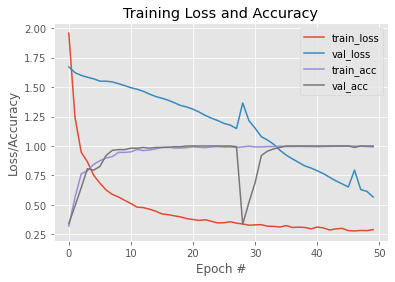

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("/content/train_val_graph.jpg")